# LLM Tutorial: Langchain

![Status](https://img.shields.io/static/v1.svg?label=Status&message=Finished&color=green)

**Filled notebook:**
[![View filled on Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/lkk688/DeepDataMiningLearning/blob/master/docs/notebooks/CMPE-pytorch10-2024Fall_huggingfaceimage.ipynb)
[![Open filled In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lkk688/DeepDataMiningLearning/blob/master/docs/notebooks/CMPE-pytorch10-2024Fall_huggingfaceimage.ipynb)       
**Author:** Kaikai Liu

## Install Pytorch

Pytorch is already installed in Colab. If you are installing the pytorch in your local machine, follow the tutorials here: from https://pytorch.org/get-started/locally/. You can check our pytorch installation tutorials for Mac/Windows/Linux/HPC here: https://deepdatamininglearning.readthedocs.io/

Click "Connect" to connect to a Colab VM instance. In Runtime->Change Runtime type to select CPU/TPU/GPU.

In [ ]:
!nvidia-smi

Mon Sep  2 17:00:17 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-12GB           Off |   00000000:3B:00.0 Off |                    0 |
| N/A   32C    P0             26W /  250W |       5MiB /  12288MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip3 install torch torchvision

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19

If the installed version of PyTorch is lower than required, uninstall it and reinstall again by running the following commands:

!pip3 uninstall --yes torch torchaudio torchvision torchtext torchdata
!pip3 install torch torchaudio torchvision torchtext torchdata

---

🚨 _Note: the above `pip install` is formatted for Jupyter notebooks. If running elsewhere you may need to drop the `!`._

---

## Check PyTorch Environment

Pytorch is very similar to the `numpy` package. Let's start with importing PyTorch. The package is called `torch`, based on its original framework [Torch](http://torch.ch/). As a first step, we can check its version:

Start a local colab container: `docker run --gpus=all -p 127.0.0.1:9000:8080 us-docker.pkg.dev/colab-images/public/runtime`, copy the link output from the terminal. In Colab, select connect to local runtime and paste the link: http://127.0.0.1:9000/?token=cf72df5a62ed764fd3bce315a542cade27d7984365045cc2

In [ ]:
!python -V

Python 3.10.12


In [ ]:
!nvidia-smi #check GPU

Sat Aug 31 20:18:15 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-12GB           Off |   00000000:3B:00.0 Off |                    0 |
| N/A   32C    P0             26W /  250W |       5MiB /  12288MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import torch
print("Using torch", torch.__version__)

Using torch 2.3.0+cu121


In [ ]:
x = torch.rand(5, 3)
print(x)

tensor([[0.4722, 0.1678, 0.9813],
        [0.6751, 0.5239, 0.5018],
        [0.0766, 0.7491, 0.2419],
        [0.8492, 0.8048, 0.9454],
        [0.8544, 0.7565, 0.1705]])


In [ ]:
import torchvision
print(torchvision.__version__)

0.18.0+cu121


In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda')  # CUDA GPU
elif torch.backends.mps.is_available():
    device = torch.device('mps') #Apple GPU
else:
    device = torch.device("cpu")

In [ ]:
print('Using device:', device)
#Additional Info when using cuda
if device.type == 'cuda':
    print("Device name: ", torch.cuda.get_device_name(0))
    print("Device properties:", torch.cuda.get_device_properties(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cuda
Device name:  Tesla P100-PCIE-12GB
Device properties: _CudaDeviceProperties(name='Tesla P100-PCIE-12GB', major=6, minor=0, total_memory=12186MB, multi_processor_count=56)
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [ ]:
torch.cuda.device_count()

1

In [ ]:
torch.version.cuda

'12.1'

In [ ]:
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [ ]:
torch.backends.cudnn.version()

8906

In [ ]:
!echo $LD_LIBRARY_PATH

/usr/local/nvidia/lib:/usr/local/nvidia/lib64


As in every machine learning framework, PyTorch provides functions that are stochastic like generating random numbers. However, a very good practice is to setup your code to be reproducible with the exact same random numbers. This is why we set a seed below.

In [ ]:
torch.manual_seed(42) # Setting the seed

## Use OpenAI directly

In [ ]:
!pip install -qU openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 10.6 MB/s eta 0:00:00


In [ ]:
#enter api key in command line
import getpass
import os
OPENAI_API_KEY = getpass.getpass()

··········


Check the list of models here: https://platform.openai.com/docs/models

In [ ]:
from openai import OpenAI
client = OpenAI()

response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "Who won the world series in 2020?"},
    {"role": "assistant", "content": "The Los Angeles Dodgers won the World Series in 2020."},
    {"role": "user", "content": "Where was it played?"}
  ]
)

In [ ]:
response

ChatCompletion(id='chatcmpl-A353WZ4PpXLjvwntwhqsaKtTX32s0', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='The 2020 World Series was played at Globe Life Field in Arlington, Texas. It was held at a neutral site due to the COVID-19 pandemic.', refusal=None, role='assistant', function_call=None, tool_calls=None))], created=1725297782, model='gpt-4o-mini-2024-07-18', object='chat.completion', service_tier=None, system_fingerprint='fp_f33667828e', usage=CompletionUsage(completion_tokens=32, prompt_tokens=53, total_tokens=85))

In [ ]:
message = response.choices[0].message.content

In [ ]:
message

'The 2020 World Series was played at Globe Life Field in Arlington, Texas. It was held at a neutral site due to the COVID-19 pandemic.'

In [ ]:
# build prompt template for simple question-answering
template = """Question: {question}

Answer: """
prompt = PromptTemplate(template=template, input_variables=["question"])

In [ ]:
import os

os.environ['OPENAI_API_KEY'] = OPENAI_API_KEY

## Langchain with NVIDIA API

ref: https://python.langchain.com/v0.2/docs/tutorials/rag/
https://github.com/NVIDIA/GenerativeAIExamples/blob/main/RAG/notebooks/langchain/langchain_basic_RAG.ipynb

LLMs can reason about wide-ranging topics, but their knowledge is limited to the public data up to a specific point in time that they were trained on. If you want to build AI applications that can reason about private data or data introduced after a model's cutoff date, you need to augment the knowledge of the model with the specific information it needs. The process of bringing the appropriate information and inserting it into the model prompt is known as Retrieval Augmented Generation (RAG).

A typical RAG application has two main components:

* Indexing: a pipeline for ingesting data from a source and indexing it. This usually happens offline.
* Retrieval and generation: the actual RAG chain, which takes the user query at run time and retrieves the relevant data from the index, then passes that to the model.

Indexing
* Load: First we need to load our data. This is done with Document Loaders.
* Split: Text splitters break large Documents into smaller chunks. This is useful both for indexing data and for passing it in to a model, since large chunks are harder to search over and won't fit in a model's finite context window.
* Store: We need somewhere to store and index our splits, so that they can later be searched over. This is often done using a VectorStore and Embeddings model.

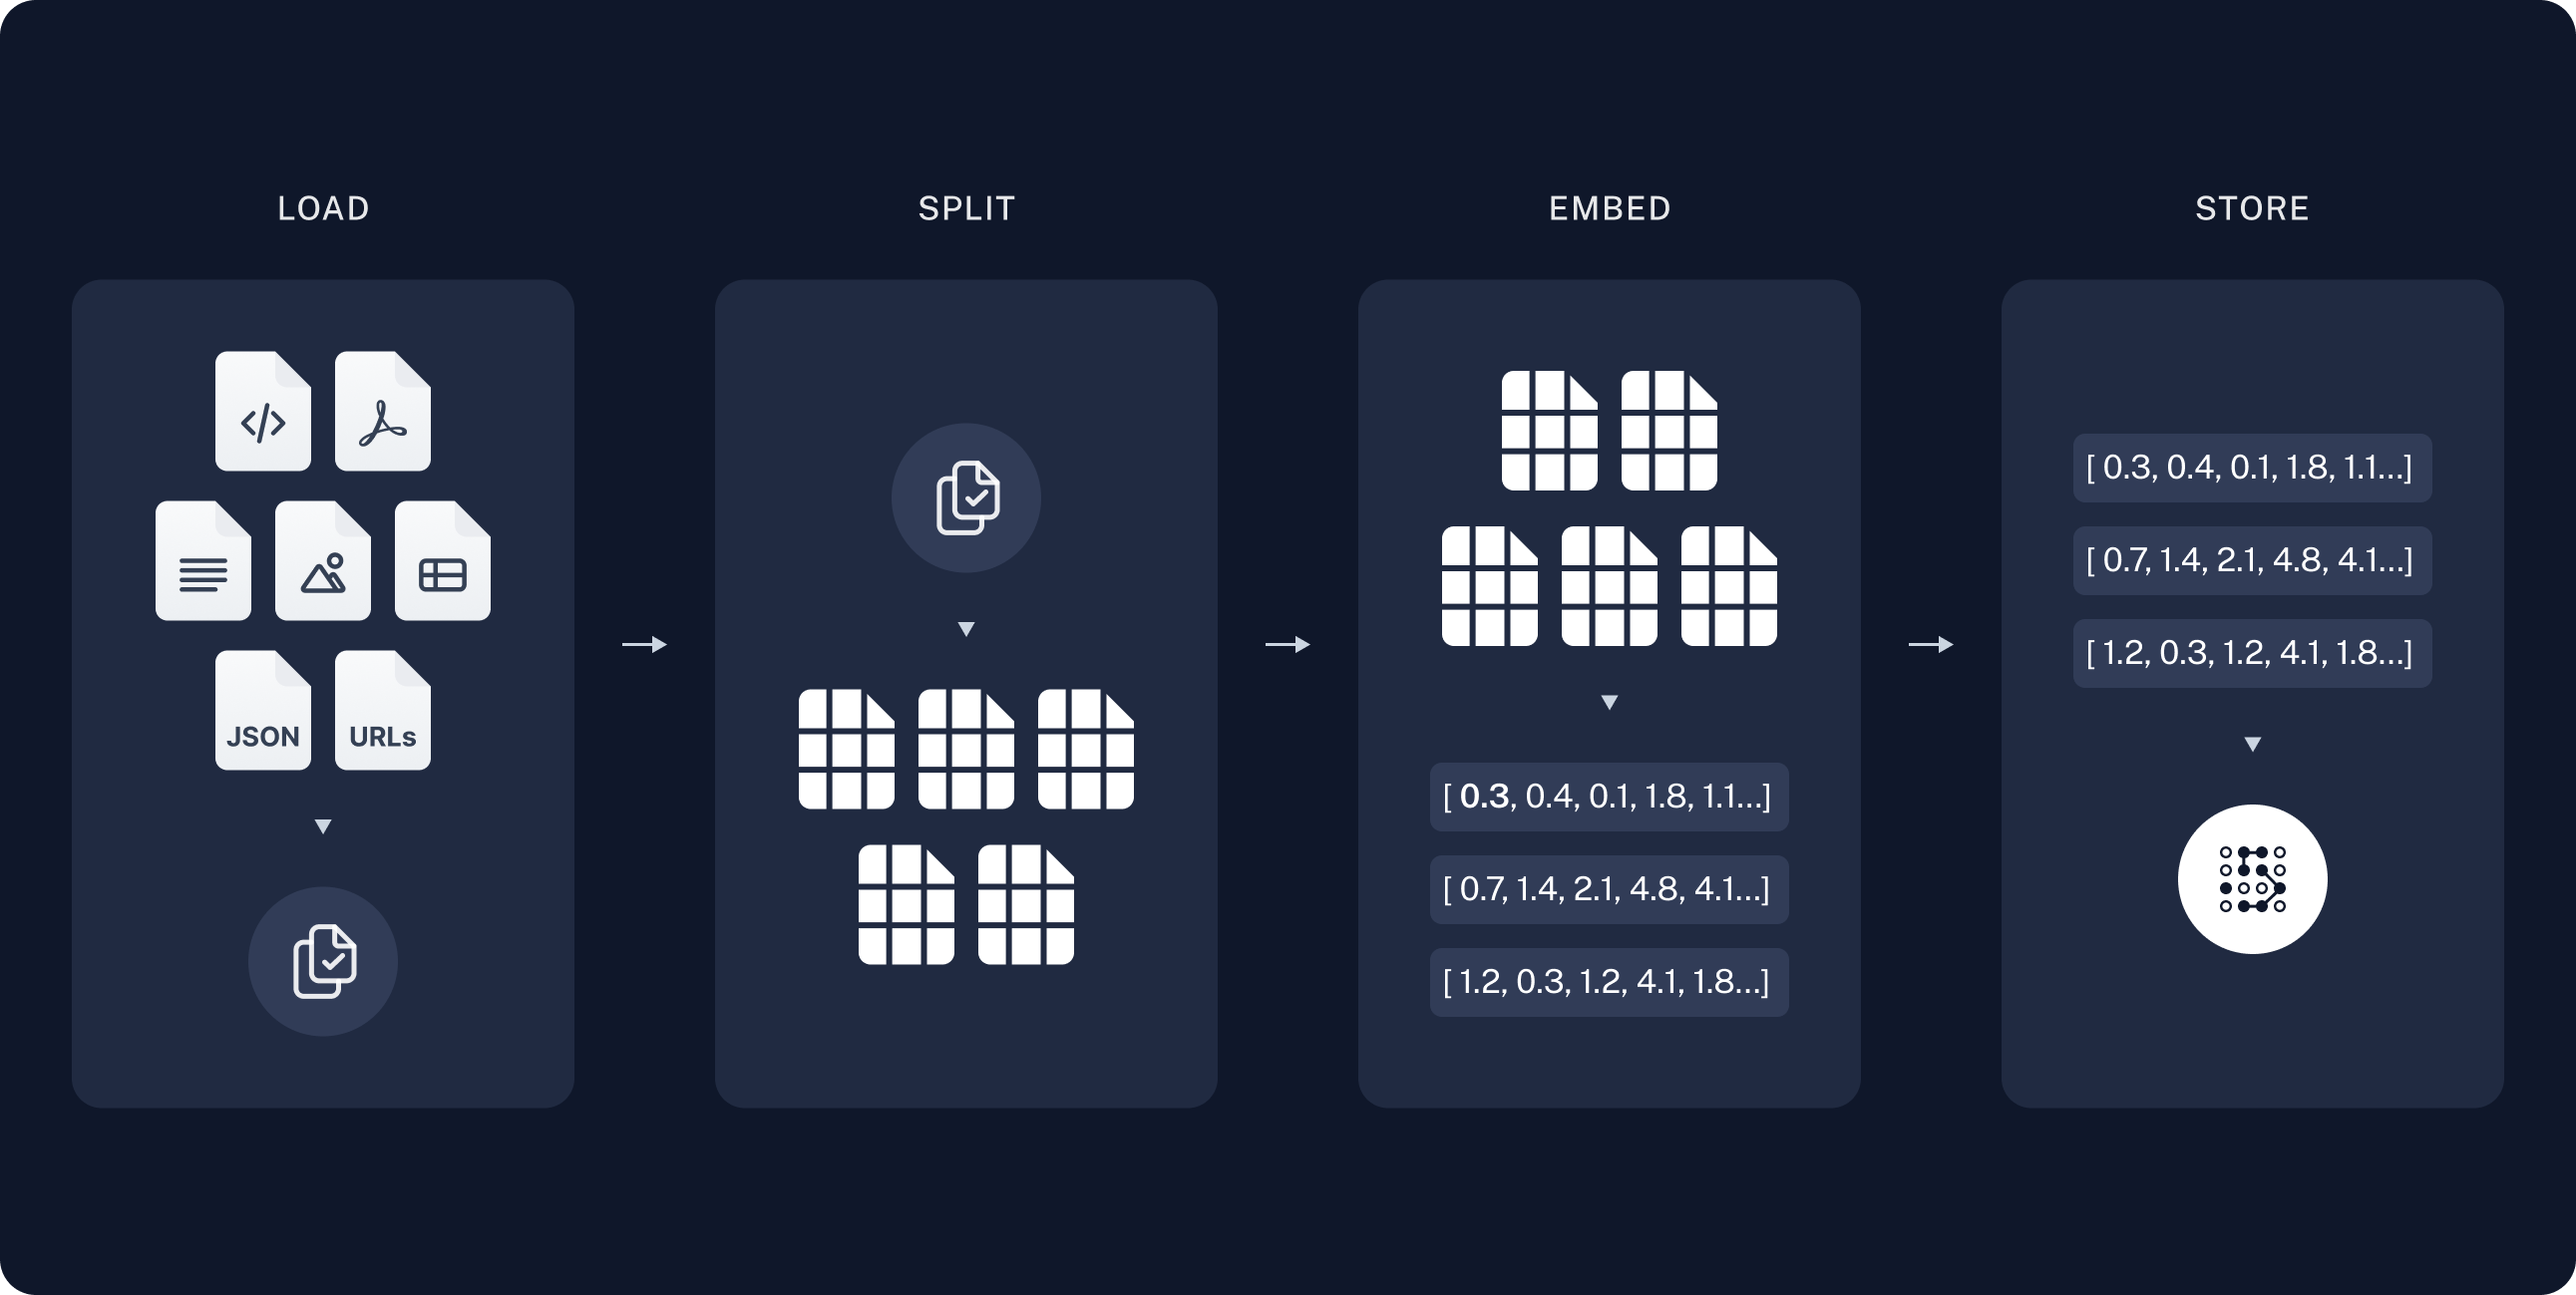

Retrieval and generation
* Retrieve: Given a user input, relevant splits are retrieved from storage using a Retriever.
* Generate: A ChatModel / LLM produces an answer using a prompt that includes the question and the retrieved data


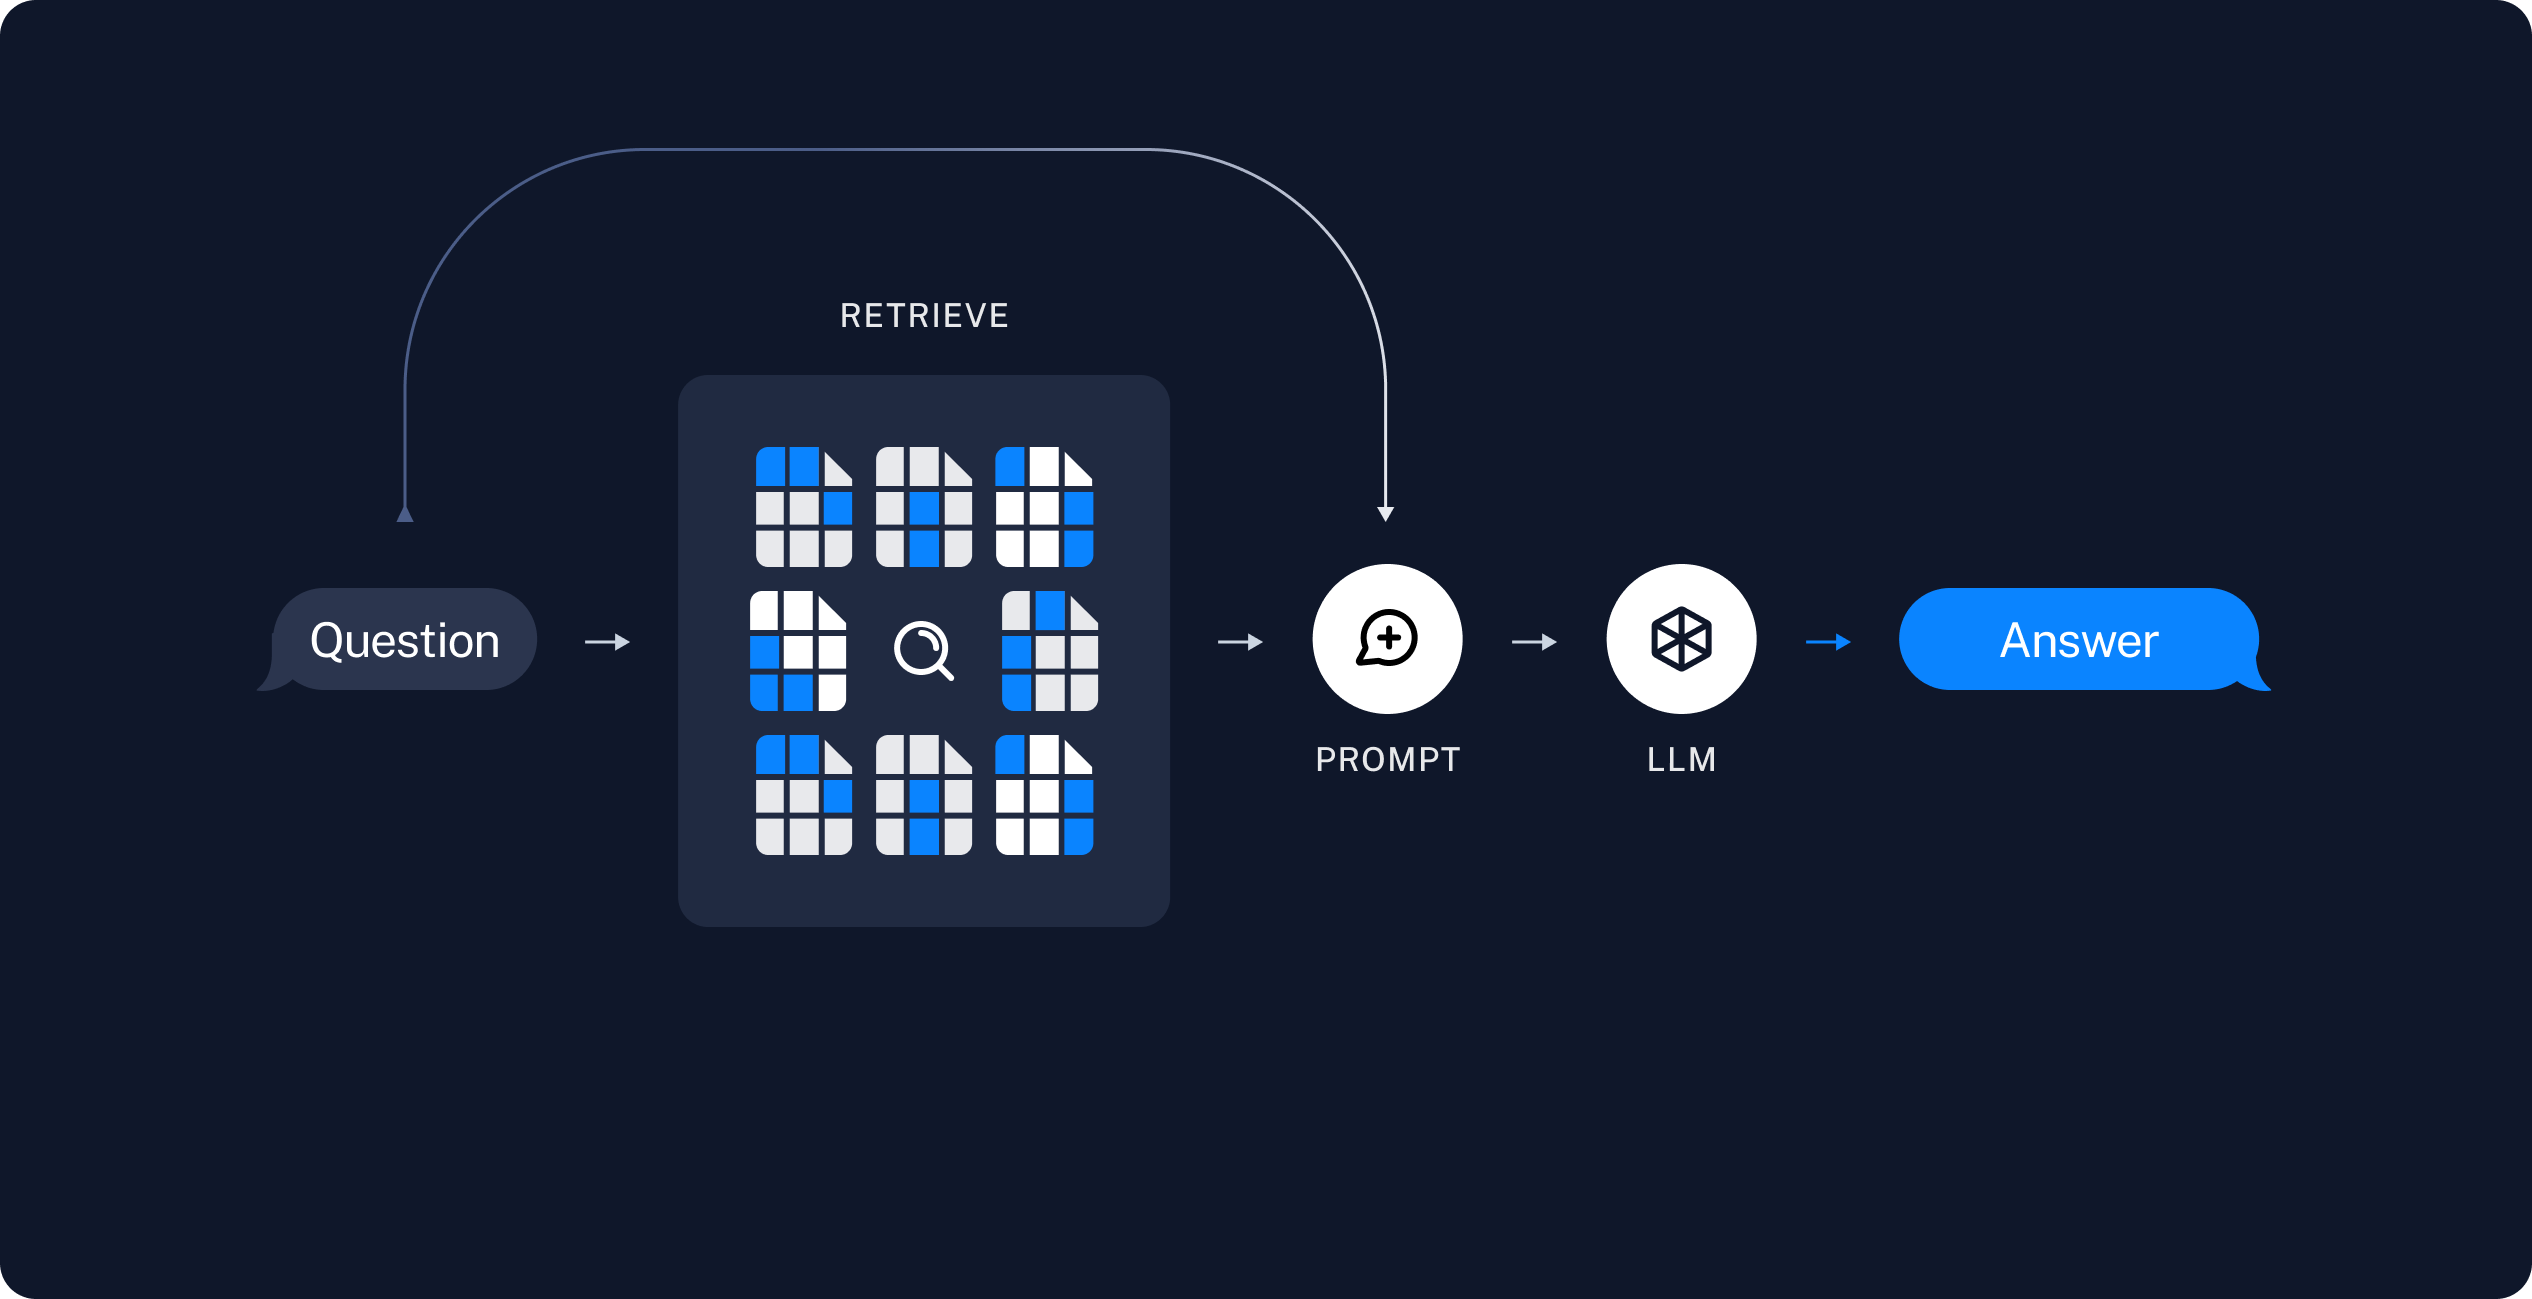

###Install dependencies

In [ ]:
! pip install langchain langchain_community langchain_chroma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 261.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 559.5/559.5 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.5/290.5 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.8 MB/s eta 0

Signup LangSmith: https://smith.langchain.com/, it helps you inspect what exactly is going on inside your chain or agent. Ref: https://docs.smith.langchain.com/

LangSmith is a platform for building production-grade LLM applications. It allows you to closely monitor and evaluate your application, so you can ship quickly and with confidence. Use of LangChain is not necessary - LangSmith works on its own!



In [ ]:
!pip install -U langsmith

To create an API key head to the Settings page. Then click Create API Key.

In [ ]:
import getpass
import os

os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_API_KEY"] = getpass.getpass()

··········


In [ ]:
!pip install -qU openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.8/367.8 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 22.8 MB/s eta 0:00:00


In [ ]:
#enter api key in command line
import getpass
import os
OPENAI_API_KEY = getpass.getpass()

··········


In [ ]:
os.environ["OPENAI_API_KEY"]=OPENAI_API_KEY

In [ ]:
!pip install faiss-gpu #faiss-cpu==1.8.0 # replace with faiss-gpu if you are using GPU

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 8.5 MB/s eta 0:00:00


### Use Langsmith

In [ ]:
import openai
from langsmith.wrappers import wrap_openai
from langsmith import traceable

# Auto-trace LLM calls in-context
client = wrap_openai(openai.Client())

@traceable # Auto-trace this function
def pipeline(user_input: str):
    result = client.chat.completions.create(
        messages=[{"role": "user", "content": user_input}],
        model="gpt-3.5-turbo"
    )
    return result.choices[0].message.content

pipeline("Hello, world!")
# Out:  Hello there! How can I assist you today?

'Hello! How can I assist you today?'

You can view the sample output trace here: https://smith.langchain.com/public/b37ca9b1-60cd-4a2a-817e-3c4e4443fdc0/r

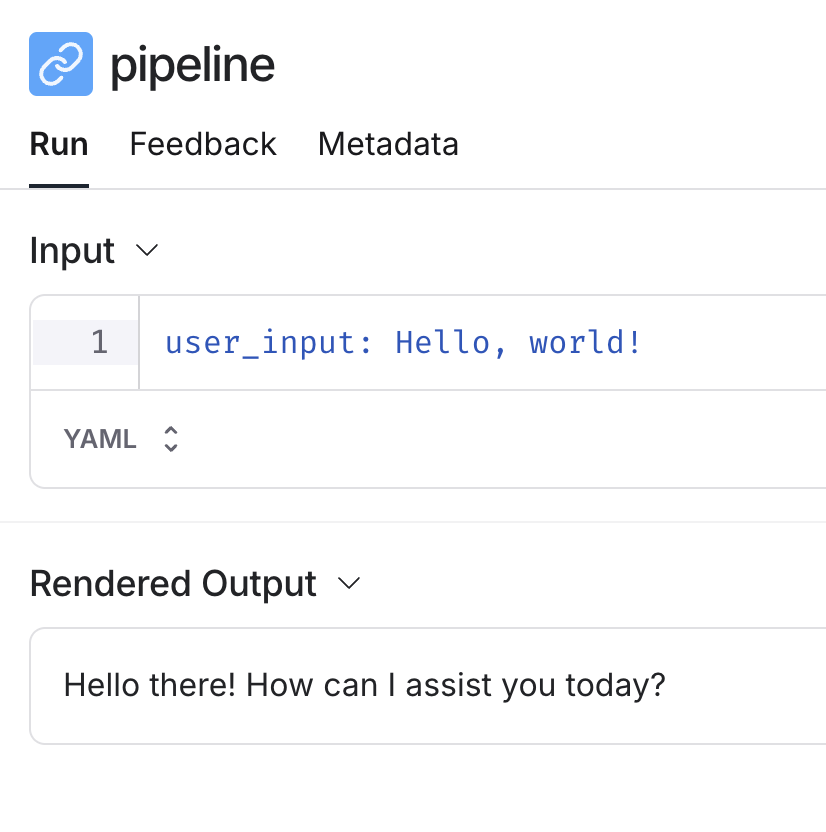

In [ ]:
from langsmith import Client
from langsmith.evaluation import evaluate

client = Client()

# Define dataset: these are your test cases
dataset_name = "Sample Dataset"
dataset = client.create_dataset(dataset_name, description="A sample dataset in LangSmith.")
client.create_examples(
    inputs=[
        {"postfix": "to LangSmith"},
        {"postfix": "to Evaluations in LangSmith"},
    ],
    outputs=[
        {"output": "Welcome to LangSmith"},
        {"output": "Welcome to Evaluations in LangSmith"},
    ],
    dataset_id=dataset.id,
)

# Define your evaluator
def exact_match(run, example):
    return {"score": run.outputs["output"] == example.outputs["output"]}

experiment_results = evaluate(
    lambda input: "Welcome " + input['postfix'], # Your AI system goes here
    data=dataset_name, # The data to predict and grade over
    evaluators=[exact_match], # The evaluators to score the results
    experiment_prefix="sample-experiment", # The name of the experiment
    metadata={
      "version": "1.0.0",
      "revision_id": "beta"
    },
)

View the evaluation results for experiment: 'sample-experiment-3aed4e4f' at:
https://smith.langchain.com/o/feef0ae6-9b8d-5b94-9c5f-1e3b3c1b8868/datasets/5de86234-b59a-4e1d-8131-f738d163ff78/compare?selectedSessions=6865351b-c36b-4644-8a62-5c8eaccab77a




0it [00:00, ?it/s]

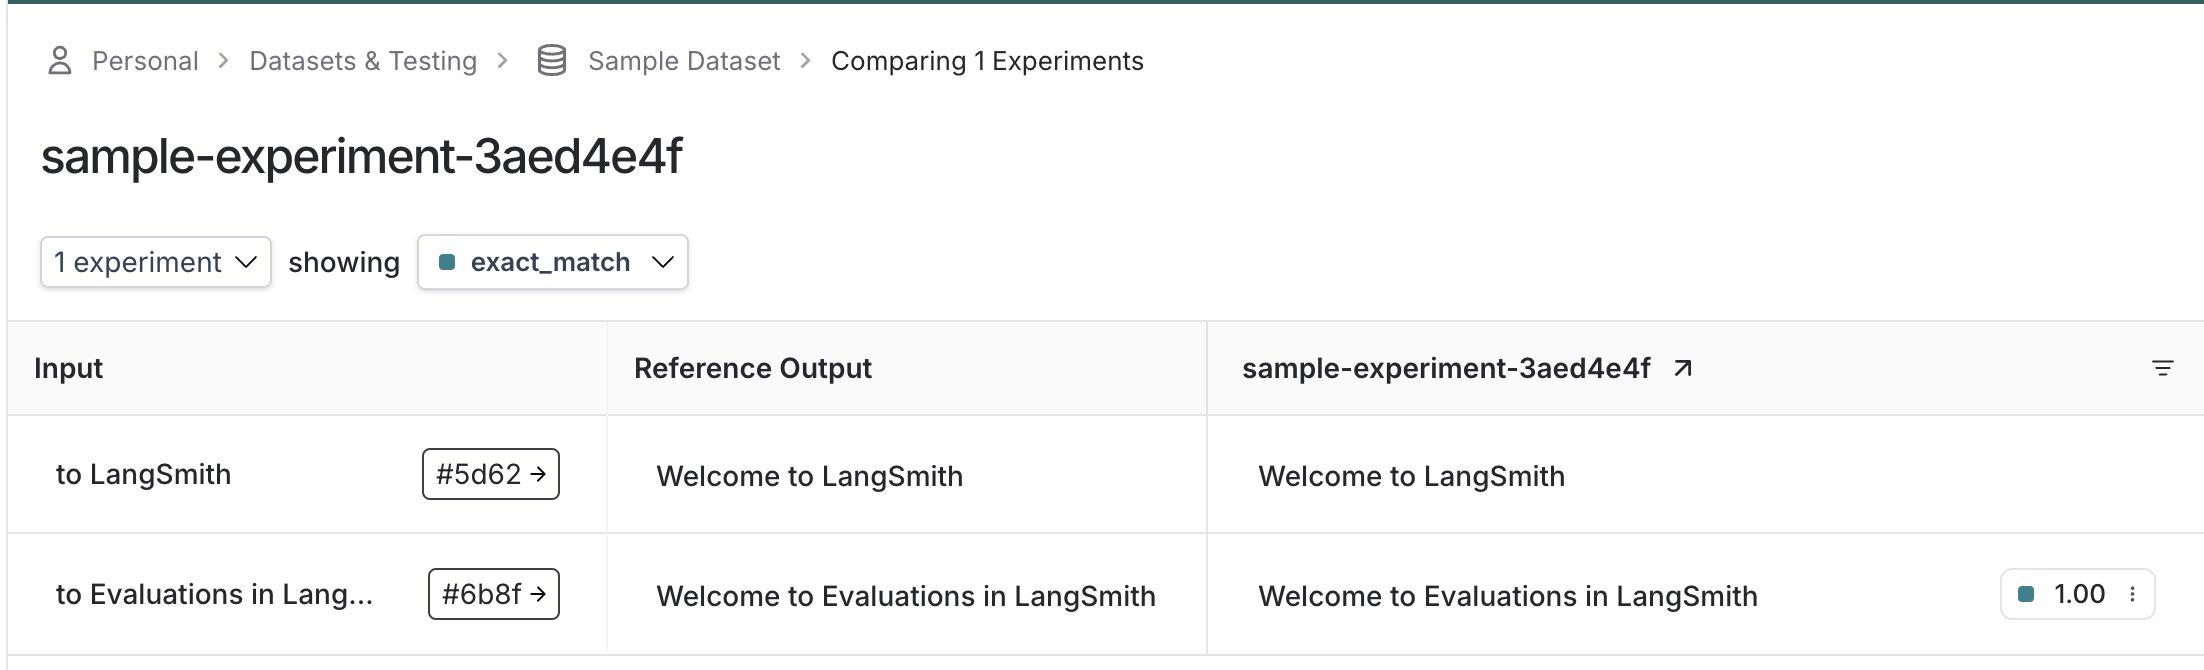

### NVIDIA API End Points

NVIDIA API Catalog: https://build.nvidia.com/explore/discover
It is a hosted platform for accessing a wide range of microservices online.

NIM microservices are containerized microservices that simplify the deployment of generative AI models like LLMs and are optimized to run on NVIDIA GPUs.
NIM microservices support models across domains like chat, embedding, reranking, and more from both the community and NVIDIA.

The langchain-nvidia-ai-endpoints Python package contains LangChain integrations for building applications that communicate with NVIDIA NIM microservices.


In [ ]:
!pip install -qU langchain-nvidia-ai-endpoints

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 99.6 MB/s eta 0:00:00


Generate API key in the following page:

In [ ]:
import getpass
import os

if not os.environ.get("NVIDIA_API_KEY", "").startswith("nvapi-"):
    nvidia_api_key = getpass.getpass("Enter your NVIDIA API key: ")
    assert nvidia_api_key.startswith("nvapi-"), f"{nvidia_api_key[:5]}... is not a valid key"
    os.environ["NVIDIA_API_KEY"] = nvidia_api_key

Enter your NVIDIA API key: ··········


### ChatNVIDIA Model

ChatModels are instances of LangChain "Runnables", which means they expose a standard interface for interacting with them.

In [96]:
from langchain_nvidia_ai_endpoints import ChatNVIDIA

# Uncomment the below code to list the availabe models
# ChatNVIDIA.get_available_models()


llm = ChatNVIDIA(
  model="meta/llama-3.1-8b-instruct",
  api_key=os.environ["NVIDIA_API_KEY"],
  temperature=0.2,
  top_p=0.7,
  max_tokens=1024,
)

To just simply call the model, we can pass in a list of messages to the .invoke method.

In [97]:
from langchain_core.messages import HumanMessage

llm.invoke([HumanMessage(content="Hi! My name is Kaikai")])

AIMessage(content="Nice to meet you, Kaikai! How's your day going so far?", response_metadata={'role': 'assistant', 'content': "Nice to meet you, Kaikai! How's your day going so far?", 'token_usage': {'prompt_tokens': 19, 'total_tokens': 36, 'completion_tokens': 17}, 'finish_reason': 'stop', 'model_name': 'meta/llama-3.1-8b-instruct'}, id='run-b50f680e-ccbc-4f73-b3cd-767d7f8f6704-0', role='assistant')

The model on its own does not have any concept of state. For example, if you ask a followup question:

In [98]:
llm.invoke([HumanMessage(content="What's my name?")])

AIMessage(content="I'm happy to chat with you, but I don't actually know your name. This is the beginning of our conversation, and I don't have any prior information about you. Would you like to introduce yourself?", response_metadata={'role': 'assistant', 'content': "I'm happy to chat with you, but I don't actually know your name. This is the beginning of our conversation, and I don't have any prior information about you. Would you like to introduce yourself?", 'token_usage': {'prompt_tokens': 16, 'total_tokens': 59, 'completion_tokens': 43}, 'finish_reason': 'stop', 'model_name': 'meta/llama-3.1-8b-instruct'}, id='run-d36ac9bc-7436-49c6-8ca5-8a0d610e2676-0', role='assistant')

To get around this, we need to pass the entire conversation history into the model.

In [99]:
from langchain_core.messages import AIMessage

llm.invoke(
    [
        HumanMessage(content="Hi! I'm Kaikai"),
        AIMessage(content="Hello Kaikai! How can I assist you today?"),
        HumanMessage(content="What's my name?"),
    ]
)

AIMessage(content='Your name is Kaikai!', response_metadata={'role': 'assistant', 'content': 'Your name is Kaikai!', 'token_usage': {'prompt_tokens': 45, 'total_tokens': 52, 'completion_tokens': 7}, 'finish_reason': 'stop', 'model_name': 'meta/llama-3.1-8b-instruct'}, id='run-877b0c71-08fc-4ba1-9350-9148cbddc8a3-0', role='assistant')

### ChatModel with History

We can use a Message History class to wrap our model and make it stateful. This will keep track of inputs and outputs of the model, and store them in some datastore. Future interactions will then load those messages and pass them into the chain as part of the input.

let's make sure to install langchain-community, as we will be using an integration in there to store message history.

A key part here is the function we pass into as the get_session_history. This function is expected to take in a session_id and return a Message History object. This session_id is used to distinguish between separate conversations, and should be passed in as part of the config when calling the new chain

https://python.langchain.com/v0.2/api_reference/core/chat_history/langchain_core.chat_history.InMemoryChatMessageHistory.html

RunnableWithMessageHistory wraps another Runnable and manages the chat message history for it; it is responsible for reading and updating the chat message history.
https://python.langchain.com/v0.2/docs/tutorials/chatbot/#:~:text=%7C%20InMemoryChatMessageHistory%20%7C-,RunnableWithMessageHistory,-We%20now%20need

In [100]:
from langchain_core.chat_history import (
    BaseChatMessageHistory,
    InMemoryChatMessageHistory,
)
from langchain_core.runnables.history import RunnableWithMessageHistory

store = {}


def get_session_history(session_id: str) -> BaseChatMessageHistory:
    if session_id not in store:
        store[session_id] = InMemoryChatMessageHistory()
    return store[session_id]


with_message_history = RunnableWithMessageHistory(llm, get_session_history)

We now need to create a config that we pass into the runnable every time. This config contains information that is not part of the input directly, but is still useful. In this case, we want to include a session_id. This should look like:

In [101]:
config = {"configurable": {"session_id": "abc2"}}

In [102]:
response = with_message_history.invoke(
    [HumanMessage(content="Hi! I'm Kaikai")],
    config=config,
)

response.content

'Nice to meet you, Kaikai! Is there something I can help you with or would you like to chat?'

In [103]:
response = with_message_history.invoke(
    [HumanMessage(content="Do you know my name?")],
    config=config,
)

response.content

"You told me your name is Kaikai. I'm just a language model, I don't have any prior knowledge about you, but you shared it with me when we started chatting."

Our chatbot now remembers things about us. If we change the config to reference a different session_id, we can see that it starts the conversation fresh.

In [104]:
config = {"configurable": {"session_id": "abc3"}}

response = with_message_history.invoke(
    [HumanMessage(content="What's my name?")],
    config=config,
)

response.content

"I'm happy to chat with you, but I don't actually know your name. I'm a large language model, I don't have the ability to retain information about individual users or recall previous conversations. Each time you interact with me, it's a new conversation and I don't have any prior knowledge about you. Would you like to introduce yourself?"

### ChatModel with prompt templates

We will add in a system message with some custom instructions. Next, we'll add in more input besides just the messages.

We will create a ChatPromptTemplate. We will utilize MessagesPlaceholder to pass all the messages in.

In [109]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a helpful assistant. Answer all questions to the best of your ability in {language}.",
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)

chain = prompt | llm

Note that this slightly changes the input type - rather than pass in a list of messages, we are now passing in a dictionary with a `messages` key where that contains a list of messages.

In [110]:
response = chain.invoke(
    {"messages": [HumanMessage(content="hi! I'm Kaikai")], "language": "English"}
)

response.content

"Nice to meet you, Kaikai! How's your day going so far?"

We can now wrap this in the same Messages History object as before

In [111]:
with_message_history = RunnableWithMessageHistory(
    chain,
    get_session_history,
    input_messages_key="messages",
)

In [113]:
config = {"configurable": {"session_id": "abc11"}}

In [114]:
response = with_message_history.invoke(
    {"messages": [HumanMessage(content="hi! I'm Kaikai")], "language": "English"},
    config=config,
)

response.content

"Nice to meet you, Kaikai! How's your day going so far?"

In [115]:
response = with_message_history.invoke(
    {"messages": [HumanMessage(content="whats my name?")], "language": "English"},
    config=config,
)

response.content

'Your name is Kaikai!'

LangChain comes with a few built-in helpers for managing a list of messages. In this case we'll use the trim_messages helper to reduce how many messages we're sending to the model. The trimmer allows us to specify how many tokens we want to keep, along with other parameters like if we want to always keep the system message and whether to allow partial messages:

In [117]:
from langchain_core.messages import SystemMessage, trim_messages

trimmer = trim_messages(
    max_tokens=65,
    strategy="last",
    token_counter=llm,
    include_system=True,
    allow_partial=False,
    start_on="human",
)

In [118]:
messages = [
    SystemMessage(content="you're a good assistant"),
    HumanMessage(content="hi! I'm bob"),
    AIMessage(content="hi!"),
    HumanMessage(content="I like vanilla ice cream"),
    AIMessage(content="nice"),
    HumanMessage(content="whats 2 + 2"),
    AIMessage(content="4"),
    HumanMessage(content="thanks"),
    AIMessage(content="no problem!"),
    HumanMessage(content="having fun?"),
    AIMessage(content="yes!"),
]

trimmer.invoke(messages)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

[SystemMessage(content="you're a good assistant"),
 HumanMessage(content="hi! I'm bob"),
 AIMessage(content='hi!'),
 HumanMessage(content='I like vanilla ice cream'),
 AIMessage(content='nice'),
 HumanMessage(content='whats 2 + 2'),
 AIMessage(content='4'),
 HumanMessage(content='thanks'),
 AIMessage(content='no problem!'),
 HumanMessage(content='having fun?'),
 AIMessage(content='yes!')]

To use it in our chain, we just need to run the trimmer before we pass the messages input to our prompt.

In [119]:
from operator import itemgetter

from langchain_core.runnables import RunnablePassthrough

chain = (
    RunnablePassthrough.assign(messages=itemgetter("messages") | trimmer)
    | prompt
    | llm
)

response = chain.invoke(
    {
        "messages": messages + [HumanMessage(content="what's my name?")],
        "language": "English",
    }
)
response.content

'Your name is Bob!'

In [120]:
response = chain.invoke(
    {
        "messages": messages + [HumanMessage(content="what math problem did i ask")],
        "language": "English",
    }
)
response.content

'You asked me to solve the math problem "2 + 2"!'

### ChatModel with Stream

One really important UX consideration for chatbot applications is streaming. LLMs can sometimes take a while to respond, and so in order to improve the user experience one thing that most applications do is stream back each token as it is generated. This allows the user to see progress.

All chains expose a .stream method, and ones that use message history are no different. We can simply use that method to get back a streaming response.

In [121]:
config = {"configurable": {"session_id": "abc15"}}
for r in with_message_history.stream(
    {
        "messages": [HumanMessage(content="hi! I'm todd. tell me a joke")],
        "language": "English",
    },
    config=config,
):
    print(r.content, end="|")

|Hi| Todd|!| Nice| to| meet| you|!| Here|'s| a| joke| for| you|:

|What| do| you| call| a| fake| nood|le|?

|(wait| for| it|...)

|An| imp|asta|!

|Hope| that| made| you| laugh|,| Todd|!| Do| you| want| to| hear| another| one|?||

Try the sync stream API:

In [122]:
chunks = []
for chunk in llm.stream("what color is the sky?"):
    chunks.append(chunk)
    print(chunk.content, end="|", flush=True)

|The| color| of| the| sky| can| vary| depending| on| the| time| of| day|,| weather| conditions|,| and| atmospheric| conditions|.| Here| are| some| common| colors| of| the| sky|:

|1|.| **|Blue|**:| On| a| clear| day|,| the| sky| typically| appears| blue| because| of| a| phenomenon| called| Ray|leigh| scattering|,| where| shorter| (|blue|)| wavelengths| of| light| are| scattered| more| than| longer| (|red|)| wavelengths| by| the| tiny| molecules| of| gases| in| the| atmosphere|.
|2|.| **|Gray|**:| On| over|cast| days|,| the| sky| can| appear| gray| due| to| the| presence| of| thick| clouds| that| block| or| scatter| sunlight|.
|3|.| **|Red|/or|ange|**:| During| sunrise| and| sunset|,| the| sky| can| take| on| hues| of| red|,| orange|,| and| pink| due| to| the| scattering| of| light| by| atmospheric| particles| and| the| angle| of| the| sun|.
|4|.| **|Purple|**:| In| some| cases|,| the| sky| can| appear| purple|,| especially| during| intense| thunder|storms| or| when| there| are| high| l

if you're working in an async environment, you may consider using the async astream API:

In [123]:
chunks = []
async for chunk in llm.astream("what color is the sky?"):
    chunks.append(chunk)
    print(chunk.content, end="|", flush=True)

|The| color| of| the| sky| can| vary| depending| on| the| time| of| day|,| weather| conditions|,| and| atmospheric| conditions|.| Here| are| some| common| colors| of| the| sky|:

|1|.| **|Blue|**:| During| clear|,| sunny| days|,| the| sky| typically| appears| blue| because| of| a| phenomenon| called| Ray|leigh| scattering|,| where| shorter| (|blue|)| wavelengths| of| light| are| scattered| more| than| longer| (|red|)| wavelengths| by| the| tiny| molecules| of| gases| in| the| atmosphere|.
|2|.| **|Gray|**:| On| over|cast| days|,| the| sky| can| appear| gray| due| to| the| scattering| of| light| by| water| dro|plets| or| ice| crystals| in| the| atmosphere|.
|3|.| **|Red|/or|ange|**:| During| sunrise| and| sunset|,| the| sky| can| take| on| hues| of| red|,| orange|,| and| pink| due| to| the| scattering| of| light| by| atmospheric| particles| and| the| angle| of| the| sun|.
|4|.| **|Purple|**:| In| some| cases|,| the| sky| can| appear| purple|,| especially| during| intense| thunder|storms

In [125]:
chunks[3]

AIMessageChunk(content=' of', id='run-d7ce92d0-ca58-440c-acdb-3ce30dd25d1c', role='assistant')

We got back something called an AIMessageChunk. This chunk represents a part of an AIMessage.

Message chunks are additive by design -- one can simply add them up to get the state of the response so far!

In [126]:
chunks[0] + chunks[1] + chunks[2] + chunks[3] + chunks[4]

AIMessageChunk(content='The color of the', id='run-d7ce92d0-ca58-440c-acdb-3ce30dd25d1c')

In [ ]:
#test llm
for chunk in llm.stream([{"role":"user","content":"Write a limerick about the wonders of GPU computing."}]):
  print(chunk.content, end="")

There once was a GPU so fine,
It computed with speed and design.
It processed with ease,
Massive data with expertise,
And solved problems in no time divine.

Build a simple chain using LangChain Expression Language (LCEL) that combines a prompt, model and a parser and verify that streaming works. We will use StrOutputParser to parse the output from the model. This is a simple parser that extracts the content field from an AIMessageChunk, giving us the token returned by the model.

In [127]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_template("tell me a joke about {topic}")
parser = StrOutputParser()
chain = prompt | llm | parser

async for chunk in chain.astream({"topic": "GPU"}):
    print(chunk, end="|", flush=True)

|Here|'s| one|:

|Why| did| the| GPU| go| to| therapy|?

|Because| it| was| feeling| a| little| "|pixel|ated|"| under| the| pressure|!

|(S|orry|,| it|'s| a| bit| of| a| "|graphic|"| joke|,| but| I| hope| it| "|render|ed|"| a| smile| on| your| face|!)||

### NVIDIA Embedding with VectorStore and Retrievers

Embedding models create a vector representation of a piece of text. You can think of a vector as an array of numbers that captures the semantic meaning of the text. By representing the text in this way, you can perform mathematical operations that allow you to do things like search for other pieces of text that are most similar in meaning. These natural language search capabilities underpin many types of context retrieval, where we provide an LLM with the relevant data it needs to effectively respond to a query.

ref: https://github.com/NVIDIA/GenerativeAIExamples/blob/main/RAG/notebooks/langchain/langchain_basic_RAG.ipynb

NVIDIAEmbeddings is a client to NVIDIA embeddings models that provides access to a NVIDIA NIM for embedding. It can connect to a hosted NIM or a local NIM using a base URL

We selected NV-Embed-QA as the embedding

In [131]:
from langchain_nvidia_ai_endpoints import NVIDIAEmbeddings

embedder = NVIDIAEmbeddings(model="NV-Embed-QA", truncate="END")

LangChain implements a Document abstraction, which is intended to represent a unit of text and associated metadata. It has two attributes:

page_content: a string representing the content;
metadata: a dict containing arbitrary metadata.
The metadata attribute can capture information about the source of the document, its relationship to other documents, and other information. Note that an individual Document object often represents a chunk of a larger document.

In [128]:
from langchain_core.documents import Document

documents = [
    Document(
        page_content="Dogs are great companions, known for their loyalty and friendliness.",
        metadata={"source": "mammal-pets-doc"},
    ),
    Document(
        page_content="Cats are independent pets that often enjoy their own space.",
        metadata={"source": "mammal-pets-doc"},
    ),
    Document(
        page_content="Goldfish are popular pets for beginners, requiring relatively simple care.",
        metadata={"source": "fish-pets-doc"},
    ),
    Document(
        page_content="Parrots are intelligent birds capable of mimicking human speech.",
        metadata={"source": "bird-pets-doc"},
    ),
    Document(
        page_content="Rabbits are social animals that need plenty of space to hop around.",
        metadata={"source": "mammal-pets-doc"},
    ),
]

Vector search is a common way to store and search over unstructured data (such as unstructured text). The idea is to store numeric vectors that are associated with the text. Given a query, we can embed it as a vector of the same dimension and use vector similarity metrics to identify related data in the store.

LangChain VectorStore objects contain methods for adding text and Document objects to the store, and querying them using various similarity metrics. They are often initialized with embedding models, which determine how text data is translated to numeric vectors.

To instantiate a vector store, we often need to provide an embedding model to specify how text should be converted into a numeric vector. Here, we demonstrate usage of LangChain VectorStores using Chroma, which includes an in-memory implementation.

In [132]:
from langchain_chroma import Chroma
#from langchain_openai import OpenAIEmbeddings
#embedder = OpenAIEmbeddings()
vectorstore = Chroma.from_documents(
    documents,
    embedding=embedder,
)

Calling .from_documents here will add the documents to the vector store. VectorStore implements methods for adding documents that can also be called after the object is instantiated.

Once we've instantiated a VectorStore that contains documents, we can query it. VectorStore includes methods for querying:

Synchronously and asynchronously;
By string query and by vector;
With and without returning similarity scores;
By similarity and maximum marginal relevance (to balance similarity with query to diversity in retrieved results).

In [133]:
vectorstore.similarity_search("cat")

[Document(metadata={'source': 'mammal-pets-doc'}, page_content='Cats are independent pets that often enjoy their own space.'),
 Document(metadata={'source': 'mammal-pets-doc'}, page_content='Rabbits are social animals that need plenty of space to hop around.'),
 Document(metadata={'source': 'mammal-pets-doc'}, page_content='Dogs are great companions, known for their loyalty and friendliness.'),
 Document(metadata={'source': 'bird-pets-doc'}, page_content='Parrots are intelligent birds capable of mimicking human speech.')]

Async query:

In [134]:
await vectorstore.asimilarity_search("cat")

[Document(metadata={'source': 'mammal-pets-doc'}, page_content='Cats are independent pets that often enjoy their own space.'),
 Document(metadata={'source': 'mammal-pets-doc'}, page_content='Rabbits are social animals that need plenty of space to hop around.'),
 Document(metadata={'source': 'mammal-pets-doc'}, page_content='Dogs are great companions, known for their loyalty and friendliness.'),
 Document(metadata={'source': 'bird-pets-doc'}, page_content='Parrots are intelligent birds capable of mimicking human speech.')]

In [135]:
# Note that providers implement different scores; Chroma here
# returns a distance metric that should vary inversely with
# similarity.

vectorstore.similarity_search_with_score("cat")

[(Document(metadata={'source': 'mammal-pets-doc'}, page_content='Cats are independent pets that often enjoy their own space.'),
  0.9148080348968506),
 (Document(metadata={'source': 'mammal-pets-doc'}, page_content='Rabbits are social animals that need plenty of space to hop around.'),
  1.2245821952819824),
 (Document(metadata={'source': 'mammal-pets-doc'}, page_content='Dogs are great companions, known for their loyalty and friendliness.'),
  1.243011474609375),
 (Document(metadata={'source': 'bird-pets-doc'}, page_content='Parrots are intelligent birds capable of mimicking human speech.'),
  1.2861437797546387)]

Return documents based on similarity to an embedded query:

In [137]:
embedding = embedder.embed_query("cat")

vectorstore.similarity_search_by_vector(embedding)

[Document(metadata={'source': 'mammal-pets-doc'}, page_content='Cats are independent pets that often enjoy their own space.'),
 Document(metadata={'source': 'mammal-pets-doc'}, page_content='Rabbits are social animals that need plenty of space to hop around.'),
 Document(metadata={'source': 'mammal-pets-doc'}, page_content='Dogs are great companions, known for their loyalty and friendliness.'),
 Document(metadata={'source': 'bird-pets-doc'}, page_content='Parrots are intelligent birds capable of mimicking human speech.')]

angChain VectorStore objects do not subclass Runnable, and so cannot immediately be integrated into LangChain Expression Language chains.

LangChain Retrievers are Runnables, so they implement a standard set of methods (e.g., synchronous and asynchronous invoke and batch operations) and are designed to be incorporated in LCEL chains.

In [138]:
from langchain_core.documents import Document
from langchain_core.runnables import RunnableLambda

retriever = RunnableLambda(vectorstore.similarity_search).bind(k=1)  # select top result

retriever.batch(["cat", "shark"])

[[Document(metadata={'source': 'mammal-pets-doc'}, page_content='Cats are independent pets that often enjoy their own space.')],
 [Document(metadata={'source': 'fish-pets-doc'}, page_content='Goldfish are popular pets for beginners, requiring relatively simple care.')]]

Vectorstores implement an as_retriever method that will generate a Retriever, specifically a VectorStoreRetriever. These retrievers include specific search_type and search_kwargs attributes that identify what methods of the underlying vector store to call, and how to parameterize them. For instance, we can replicate the above with the following:

In [139]:
retriever = vectorstore.as_retriever(
    search_type="similarity",
    search_kwargs={"k": 1},
)

retriever.batch(["cat", "shark"])

[[Document(metadata={'source': 'mammal-pets-doc'}, page_content='Cats are independent pets that often enjoy their own space.')],
 [Document(metadata={'source': 'fish-pets-doc'}, page_content='Goldfish are popular pets for beginners, requiring relatively simple care.')]]

VectorStoreRetriever supports search types of "similarity" (default), "mmr" (maximum marginal relevance, described above), and "similarity_score_threshold". We can use the latter to threshold documents output by the retriever by similarity score.

Retrievers can easily be incorporated into more complex applications, such as retrieval-augmented generation (RAG) applications that combine a given question with retrieved context into a prompt for a LLM.

In [140]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough

message = """
Answer this question using the provided context only.

{question}

Context:
{context}
"""

prompt = ChatPromptTemplate.from_messages([("human", message)])

rag_chain = {"context": retriever, "question": RunnablePassthrough()} | prompt | llm

In [141]:
response = rag_chain.invoke("tell me about cats")

print(response.content)

Cats are independent pets that often enjoy their own space.


## RAG with NVIDIA API

RAG is a technique for augmenting LLM knowledge with additional data. The process of bringing the appropriate information and inserting it into the model prompt is known as Retrieval Augmented Generation (RAG).

A typical RAG application has two main components:

Indexing: a pipeline for ingesting data from a source and indexing it. This usually happens offline.

Retrieval and generation: the actual RAG chain, which takes the user query at run time and retrieves the relevant data from the index, then passes that to the model.



### Text data RAG Example

we are loading a toy data from a text documents and in real-time data can be loaded from various sources.

In [ ]:
!wget https://raw.githubusercontent.com/hwchase17/langchain/v0.0.200/docs/modules/state_of_the_union.txt

--2024-09-09 16:59:29--  https://raw.githubusercontent.com/hwchase17/langchain/v0.0.200/docs/modules/state_of_the_union.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39027 (38K) [text/plain]
Saving to: ‘state_of_the_union.txt’

state_of_the_union. 100%[===================>]  38.11K  --.-KB/s    in 0.001s  

2024-09-09 16:59:30 (37.7 MB/s) - ‘state_of_the_union.txt’ saved [39027/39027]



In [ ]:
!ls

sample_data  state_of_the_union.txt


In [ ]:
import os
from pathlib import Path

TOY_DATA_PATH = "./"
# We read in the text data and prepare them into vectorstore
ps = os.listdir(TOY_DATA_PATH)
data = []
sources = []
for p in ps:
    if p.endswith('.txt'):
        path2file=TOY_DATA_PATH+p
        print(path2file)
        with open(path2file,encoding="utf-8") as f:
            lines=f.readlines()
            for line in lines:
                if len(line)>=1:
                    data.append(line)
                    sources.append(path2file)

./state_of_the_union.txt


In [ ]:
# Do some basic cleaning and remove empty lines
documents=[d for d in data if d != '\n']
len(data), len(documents), data[0]

(723,
 365,
 'Madam Speaker, Madam Vice President, our First Lady and Second Gentleman. Members of Congress and the Cabinet. Justices of the Supreme Court. My fellow Americans.  \n')

Process the documents into vectorstore and save it to disk

Real world documents can be very long, this makes it hard to fit in the context window of many models. Even for those models that could fit the full post in their context window, models can struggle to find information in very long inputs.

we’ll split the Document into chunks for embedding and vector storage

In [ ]:
# Here we create a faiss vector store from the documents and save it to disk.
from langchain_community.vectorstores import FAISS
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain.text_splitter import CharacterTextSplitter

text_splitter = CharacterTextSplitter(chunk_size=400, separator=" ", chunk_overlap=80)
docs = []
metadatas = []

for i, d in enumerate(documents):
    splits = text_splitter.split_text(d)
    docs.extend(splits)
    metadatas.extend([{"source": sources[i]}] * len(splits))

In [ ]:
len(docs)

365

In [ ]:
docs[0]

'Madam Speaker, Madam Vice President, our First Lady and Second Gentleman. Members of Congress and the Cabinet. Justices of the Supreme Court. My fellow Americans.'

To enable runtime search, we index text chunks by embedding each document split and storing these embeddings in a vector database. Later to search, we embed the query and perform a similarity search to find the stored splits with embeddings most similar to the query.

In [ ]:
# you will only need to do this once, later on we will restore the already saved vectorstore
store = FAISS.from_texts(docs, embedder , metadatas=metadatas)
VECTOR_STORE = './nv_embedding'
store.save_local(VECTOR_STORE)

Read the previously processed & saved vectore store back

In [ ]:
# Load the FAISS vectorestore back.
store = FAISS.load_local(VECTOR_STORE, embedder, allow_dangerous_deserialization=True)

Wrap the restored vectorsore into a retriever and ask our question

In [ ]:
retriever = store.as_retriever()

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "Answer solely based on the following context:\n<Documents>\n{context}\n</Documents>",
        ),
        ("user", "{question}"),
    ]
)

# Langchain's LCEL(LangChain Expression Language) Runnable protocol is used to define the chain
# LCEL allows pipe together components and functions
chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

chain.invoke("Tell me about Ketanji Brown Jackson.")

"According to the provided text, Ketanji Brown Jackson is a Circuit Court of Appeals Judge who has been nominated to a position. She is described as one of the nation's top legal minds and is expected to continue the legacy of excellence of Justice Breyer."

### RAG Example with LLM, Embedding & Reranking

In [ ]:
# Let's test a more complex query using the above LLM Embedding chain and see if the reranker can help.
chain.invoke("In which year the state of the union was signed?")

"The text does not explicitly mention the year the State of the Union was signed. However, it does mention that it is the nation's 245th year, which implies that the year of the State of the Union address is 245 years after the nation's founding."

Enhancing accuracy for single data sources

how a re-ranking model can be used to combine retrieval results and improve accuracy during retrieval of documents.

ref: https://github.com/langchain-ai/langchain-nvidia/blob/main/libs/ai-endpoints/docs/retrievers/nvidia_rerank.ipynb

In [ ]:
from langchain_nvidia_ai_endpoints import NVIDIARerank
from langchain_core.runnables import RunnableParallel

# We will narrow the collection to 100 results and further narrow it to 10 with the reranker.
retriever = store.as_retriever(search_kwargs={'k':100}) # typically k will be 1000 for real world use-cases
ranker = NVIDIARerank(model='nv-rerank-qa-mistral-4b:1', top_n=10)

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "Answer solely based on the following context:\n<Documents>\n{context}\n</Documents>",
        ),
        ("user", "{question}"),
    ]
)

reranker = lambda input: ranker.compress_documents(query=input['question'], documents=input['context'])

chain_with_ranker = (
    RunnableParallel({"context": retriever, "question": RunnablePassthrough()})
    | {"context": reranker, "question": lambda input: input['question']}
    | prompt
    | llm
    | StrOutputParser()
)
chain_with_ranker.invoke("In which year the state of the union was signed??")

"The year is not explicitly mentioned in the provided context. However, it is mentioned that it is the nation's 245th year, which would imply that the year is 245 years after the nation's founding."

In this notebook, we have used NVIDIA NIM microservices from the NVIDIA API Catalog.
The above APIs, ChatNVIDIA, NVIDIAEmbedding, and NVIDIARerank, also support self-hosted NIM microservices.
Change the base_url to your deployed NIM URL. NIM can be hosted locally using Docker, following the NVIDIA NIM for LLMs documentation. https://docs.nvidia.com/nim/large-language-models/latest/getting-started.html

In [ ]:
# Example Code snippet if you want to use a self-hosted NIM
from langchain_nvidia_ai_endpoints import ChatNVIDIA

# connect to an LLM NIM running at localhost:8000, specifying a specific model
llm = ChatNVIDIA(base_url="http://localhost:8000/v1", model="meta/llama3-8b-instruct")

In many Q&A applications we want to allow the user to have a back-and-forth conversation, meaning the application needs some sort of "memory" of past questions and answers, and some logic for incorporating those into its current thinking.

https://python.langchain.com/v0.2/docs/tutorials/qa_chat_history/

### RAG QA for Website Example

we’ll build an app that answers questions about the content of a website. The specific website we will use is the LLM Powered Autonomous Agents blog post by Lilian Weng, which allows us to ask questions about the contents of the post.
https://python.langchain.com/v0.2/docs/tutorials/rag/


In [ ]:
import bs4
from langchain import hub
from langchain_chroma import Chroma
from langchain_community.document_loaders import WebBaseLoader
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_text_splitters import RecursiveCharacterTextSplitter

# Load, chunk and index the contents of the blog.
loader = WebBaseLoader(
    web_paths=("https://lilianweng.github.io/posts/2023-06-23-agent/",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("post-content", "post-title", "post-header")
        )
    ),
)
docs = loader.load()

In this case only HTML tags with class “post-content”, “post-title”, or “post-header” are relevant, so we’ll remove all others.

In [ ]:
len(docs)

1

In [ ]:
len(docs[0].page_content)

43131

In [ ]:
print(docs[0].page_content[:500])



      LLM Powered Autonomous Agents
    
Date: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng


Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.
Agent System Overview#
In


In [ ]:
#from langchain_openai import OpenAIEmbeddings
from langchain_nvidia_ai_endpoints import NVIDIAEmbeddings

embedder = NVIDIAEmbeddings(model="NV-Embed-QA", truncate="END")
# embedder = OpenAIEmbeddings()

#split our documents into chunks of 1000 characters with 200 characters of overlap between chunks.
#The overlap helps mitigate the possibility of separating a statement from important context related to it.
#add_start_index=True so that the character index at which each split Document starts within the initial Document is preserved as metadata attribute “start_index”.
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
splits = text_splitter.split_documents(docs)
vectorstore = Chroma.from_documents(documents=splits, embedding=embedder)

# Retrieve and generate using the relevant snippets of the blog.
retriever = vectorstore.as_retriever()
#retriever = vectorstore.as_retriever(search_type="similarity", search_kwargs={"k": 6})
prompt = hub.pull("rlm/rag-prompt")


def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)


rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

rag_chain.invoke("What is Task Decomposition?")

/usr/local/lib/python3.10/dist-packages/langsmith/client.py:5519: LangChainBetaWarning: The function `loads` is in beta. It is actively being worked on, so the API may change.
  prompt = loads(json.dumps(prompt_object.manifest))


'Task Decomposition is the process of breaking down a complicated task into smaller, simpler steps. This is often done by a Large Language Model (LLM) using techniques such as Chain of Thought (CoT) or Tree of Thoughts (Yao et al. 2023). The goal is to transform big tasks into multiple manageable tasks, allowing for more efficient planning and execution.'

In [ ]:
len(splits)

66

In [ ]:
len(splits[0].page_content)

969

In [ ]:
splits[10].metadata

{'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}

LangChain defines a Retriever interface which wraps an index that can return relevant Documents given a string query.

The most common type of Retriever is the VectorStoreRetriever, which uses the similarity search capabilities of a vector store to facilitate retrieval. Any VectorStore can easily be turned into a Retriever with VectorStore.as_retriever():

In [ ]:
retrieved_docs = retriever.invoke("What are the approaches to Task Decomposition?")

len(retrieved_docs)

4

Retriever: An object that returns Documents given a text query

In [ ]:
print(retrieved_docs[0].page_content)

Tree of Thoughts (Yao et al. 2023) extends CoT by exploring multiple reasoning possibilities at each step. It first decomposes the problem into multiple thought steps and generates multiple thoughts per step, creating a tree structure. The search process can be BFS (breadth-first search) or DFS (depth-first search) with each state evaluated by a classifier (via a prompt) or majority vote.
Task decomposition can be done (1) by LLM with simple prompting like "Steps for XYZ.\n1.", "What are the subgoals for achieving XYZ?", (2) by using task-specific instructions; e.g. "Write a story outline." for writing a novel, or (3) with human inputs.


use a prompt for RAG that is checked into the LangChain prompt hub: https://smith.langchain.com/hub/rlm/rag-prompt.

In [ ]:
example_messages = prompt.invoke(
    {"context": "filler context", "question": "filler question"}
).to_messages()

example_messages

[HumanMessage(content="You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: filler question \nContext: filler context \nAnswer:")]

In [ ]:
print(example_messages[0].content)

You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: filler question 
Context: filler context 
Answer:


use the LCEL Runnable protocol to define the chain, allowing us to

pipe together components and functions in a transparent way
automatically trace our chain in LangSmith
get streaming, async, and batched calling out of the box.

In [ ]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough


def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)


rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

for chunk in rag_chain.stream("What is Task Decomposition?"):
    print(chunk, end="", flush=True)

Task Decomposition is the process of breaking down a complicated task into smaller, manageable steps. This is achieved through techniques such as Chain of Thought (CoT) and Tree of Thoughts, which transform big tasks into multiple smaller tasks and shed light on the model's thinking process. Task decomposition can be done using LLM with simple prompting, task-specific instructions, or human inputs.

the input to prompt is expected to be a dict with keys "context" and "question". So the first element of this chain builds runnables that will calculate both of these from the input question:

retriever | format_docs passes the question through the retriever, generating Document objects, and then to format_docs to generate strings;
RunnablePassthrough() passes through the input question unchanged.

In [ ]:
chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
)

Then chain.invoke(question) would build a formatted prompt, ready for inference.

In [ ]:
result=chain.invoke("What are the approaches to Task Decomposition?")

In [ ]:
result

ChatPromptValue(messages=[HumanMessage(content='You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don\'t know the answer, just say that you don\'t know. Use three sentences maximum and keep the answer concise.\nQuestion: What are the approaches to Task Decomposition? \nContext: Tree of Thoughts (Yao et al. 2023) extends CoT by exploring multiple reasoning possibilities at each step. It first decomposes the problem into multiple thought steps and generates multiple thoughts per step, creating a tree structure. The search process can be BFS (breadth-first search) or DFS (depth-first search) with each state evaluated by a classifier (via a prompt) or majority vote.\nTask decomposition can be done (1) by LLM with simple prompting like "Steps for XYZ.\\n1.", "What are the subgoals for achieving XYZ?", (2) by using task-specific instructions; e.g. "Write a story outline." for writing a novel, or (3) with human inpu

### Built-in chains

LangChain includes convenience functions that implement the above LCEL. We compose two functions:

  * `create_stuff_documents_chain` specifies how retrieved context is fed into a prompt and LLM. In this case, we will "stuff" the contents into the prompt -- i.e., we will include all retrieved context without any summarization or other processing. It largely implements our above rag_chain, with input keys context and input-- it generates an answer using retrieved context and query.
  * `create_retrieval_chain` adds the retrieval step and propagates the retrieved context through the chain, providing it alongside the final answer. It has input key input, and includes input, context, and answer in its output.

In [ ]:
from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_core.prompts import ChatPromptTemplate

system_prompt = (
    "You are an assistant for question-answering tasks. "
    "Use the following pieces of retrieved context to answer "
    "the question. If you don't know the answer, say that you "
    "don't know. Use three sentences maximum and keep the "
    "answer concise."
    "\n\n"
    "{context}"
)

prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        ("human", "{input}"),
    ]
)


question_answer_chain = create_stuff_documents_chain(llm, prompt)
rag_chain = create_retrieval_chain(retriever, question_answer_chain)

response = rag_chain.invoke({"input": "What is Task Decomposition?"})
print(response["answer"])

Task Decomposition is the process of breaking down a complex task into smaller, manageable tasks or steps. This helps an agent or system to plan and execute the task more effectively. It involves identifying the individual steps required to complete the task and organizing them in a logical order.


Often in Q&A applications it's important to show users the sources that were used to generate the answer. LangChain's built-in create_retrieval_chain will propagate retrieved source documents through to the output in the "context" key:

In [ ]:
for document in response["context"]:
    print(document)
    print()

page_content='Fig. 1. Overview of a LLM-powered autonomous agent system.
Component One: Planning#
A complicated task usually involves many steps. An agent needs to know what they are and plan ahead.
Task Decomposition#
Chain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks. The model is instructed to “think step by step” to utilize more test-time computation to decompose hard tasks into smaller and simpler steps. CoT transforms big tasks into multiple manageable tasks and shed lights into an interpretation of the model’s thinking process.' metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}

page_content='Tree of Thoughts (Yao et al. 2023) extends CoT by exploring multiple reasoning possibilities at each step. It first decomposes the problem into multiple thought steps and generates multiple thoughts per step, creating a tree structure. The search process can be BFS (breadth-first search

In [ ]:
vectorstore

In [ ]:
# cleanup
vectorstore.delete_collection()

https://python.langchain.com/v0.2/docs/tutorials/rag/

### RAG QA for PDF data

https://python.langchain.com/v0.2/docs/tutorials/pdf_qa/

create a system that can answer questions about PDF files. More specifically, you'll use a Document Loader to load text in a format usable by an LLM, then build a retrieval-augmented generation (RAG) pipeline to answer questions, including citations from the source material.

We'll use a document from Nike's annual public SEC report. It's over 100 pages long, and contains some crucial data mixed with longer explanatory text: https://s1.q4cdn.com/806093406/files/doc_downloads/2023/414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf

In [147]:
!wget https://s1.q4cdn.com/806093406/files/doc_downloads/2023/414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf

--2024-09-11 20:09:02--  https://s1.q4cdn.com/806093406/files/doc_downloads/2023/414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf
Resolving s1.q4cdn.com (s1.q4cdn.com)... 68.70.205.4, 68.70.205.1, 68.70.205.2, ...
Connecting to s1.q4cdn.com (s1.q4cdn.com)|68.70.205.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3463188 (3.3M) [application/pdf]
Saving to: ‘414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf.2’

414759-1-_5_Nike-NP 100%[===================>]   3.30M  3.65MB/s    in 0.9s    

2024-09-11 20:09:04 (3.65 MB/s) - ‘414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf.2’ saved [3463188/3463188]



In [144]:
!pip install pypdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 6.0 MB/s eta 0:00:00


In [148]:
from langchain_community.document_loaders import PyPDFLoader #powered by the pypdf package

file_path = "./414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf"
loader = PyPDFLoader(file_path)

docs = loader.load()

print(len(docs))

106


creates a LangChain Document for each page of the PDF with the page's content and some metadata about where in the document the text came from.

In [149]:
print(docs[0].page_content[0:100])
print(docs[0].metadata)

FORM 10-K FORM 10-K
{'source': './414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf', 'page': 0}


Using a text splitter, you'll split your loaded documents into smaller documents that can more easily fit into an LLM's context window, then load them into a vector store. You can then create a retriever from the vector store for use in our RAG chain:

In [150]:
from langchain_chroma import Chroma
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
splits = text_splitter.split_documents(docs)
vectorstore = Chroma.from_documents(documents=splits, embedding=embedder)

retriever = vectorstore.as_retriever()

Finally, you'll use some built-in helpers to construct the final rag_chain:

In [151]:
from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_core.prompts import ChatPromptTemplate

system_prompt = (
    "You are an assistant for question-answering tasks. "
    "Use the following pieces of retrieved context to answer "
    "the question. If you don't know the answer, say that you "
    "don't know. Use three sentences maximum and keep the "
    "answer concise."
    "\n\n"
    "{context}"
)

prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        ("human", "{input}"),
    ]
)


question_answer_chain = create_stuff_documents_chain(llm, prompt)
rag_chain = create_retrieval_chain(retriever, question_answer_chain)

results = rag_chain.invoke({"input": "What was Nike's revenue in 2023?"})

results

{'input': "What was Nike's revenue in 2023?",
 'context': [Document(metadata={'page': 36, 'source': './414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf'}, page_content='FISCAL 2023 NIKE BRAND REVENUE HIGHLIGHTS\nThe following tables present NIKE Brand revenues disaggregated by reportable operating segment, distribution channel and \nmajor product line:\nFISCAL 2023 COMPARED TO FISCAL 2022\n•NIKE, Inc. Revenues were $51.2 billion in fiscal 2023, which increased 10% and 16% compared to fiscal 2022 on a reported \nand currency-neutral basis, respectively. The increase was due to higher revenues in North America, Europe, Middle East & \nAfrica ("EMEA"), APLA and Greater China, which contributed approximately 7, 6, 2 and 1 percentage points to NIKE, Inc. \nRevenues, respectively. \n•NIKE Brand revenues, which represented over 90% of NIKE, Inc. Revenues,  increased  10% and 16% on a reported and \ncurrency-neutral basis, respectively. This increase was primarily due to higher revenues in Men\'s, 

You can see that you get both a final answer in the answer key of the results dict, and the context the LLM used to generate an answer.

Examining the values under the context further, you can see that they are documents that each contain a chunk of the ingested page content. Usefully, these documents also preserve the original metadata from way back when you first loaded them:

In [152]:
print(results["context"][0].page_content)

FISCAL 2023 NIKE BRAND REVENUE HIGHLIGHTS
The following tables present NIKE Brand revenues disaggregated by reportable operating segment, distribution channel and 
major product line:
FISCAL 2023 COMPARED TO FISCAL 2022
•NIKE, Inc. Revenues were $51.2 billion in fiscal 2023, which increased 10% and 16% compared to fiscal 2022 on a reported 
and currency-neutral basis, respectively. The increase was due to higher revenues in North America, Europe, Middle East & 
Africa ("EMEA"), APLA and Greater China, which contributed approximately 7, 6, 2 and 1 percentage points to NIKE, Inc. 
Revenues, respectively. 
•NIKE Brand revenues, which represented over 90% of NIKE, Inc. Revenues,  increased  10% and 16% on a reported and 
currency-neutral basis, respectively. This increase was primarily due to higher revenues in Men's, the Jordan Brand, 
Women's and Kids' which grew 17%, 35%,11% and 10%, respectively, on a wholesale equivalent basis.


In [153]:
print(results["context"][0].metadata)

{'page': 36, 'source': './414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf'}


## RAG using NVIDIA AI Endpoints for LangChain with two chat chains

### Install dependencies

https://github.com/NVIDIA/GenerativeAIExamples/blob/main/RAG/notebooks/langchain/RAG_for_HTML_docs_with_Langchain_NVIDIA_AI_Endpoints.ipynb

In [73]:
!pip install langchain langchain_community langchain_chroma

In [74]:
!pip install faiss-gpu #==1.7.2 # replace with faiss-cpu if you don't have a gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 8.0 MB/s eta 0:00:00


In [75]:
!pip install -qU langchain-nvidia-ai-endpoints

In [76]:
import getpass

if not os.environ.get("NVIDIA_API_KEY", "").startswith("nvapi-"):
    nvapi_key = getpass.getpass("Enter your NVIDIA API key: ")
    assert nvapi_key.startswith("nvapi-"), f"{nvapi_key[:5]}... is not a valid key"
    os.environ["NVIDIA_API_KEY"] = nvapi_key

### Load Html data and create embedding

In [77]:
import re
from typing import List, Union

import requests
from bs4 import BeautifulSoup

def html_document_loader(url: Union[str, bytes]) -> str:
    """
    Loads the HTML content of a document from a given URL and return it's content.

    Args:
        url: The URL of the document.

    Returns:
        The content of the document.

    Raises:
        Exception: If there is an error while making the HTTP request.

    """
    try:
        response = requests.get(url)
        html_content = response.text
    except Exception as e:
        print(f"Failed to load {url} due to exception {e}")
        return ""

    try:
        # Create a Beautiful Soup object to parse html
        soup = BeautifulSoup(html_content, "html.parser")

        # Remove script and style tags
        for script in soup(["script", "style"]):
            script.extract()

        # Get the plain text from the HTML document
        text = soup.get_text()

        # Remove excess whitespace and newlines
        text = re.sub("\s+", " ", text).strip()

        return text
    except Exception as e:
        print(f"Exception {e} while loading document")
        return ""

Make sure to pay attention to the chunk_size parameter in TextSplitter. Setting the right chunk size is critical for RAG performance, as much of a RAG’s success is based on the retrieval step finding the right context for generation. The entire prompt (retrieved chunks + user query) must fit within the LLM’s context window. Therefore, you should not specify chunk sizes too big, and balance them out with the estimated query size. For example, while OpenAI LLMs have a context window of 8k-32k tokens, Llama3 is limited to 8k tokens. Experiment with different chunk sizes, but typical values should be 100-600, depending on the LLM.

In [81]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
def create_embeddings(embedding_path: str = "./nv_embedding"):

    embedding_path = "./nv_embedding"
    print(f"Storing embeddings to {embedding_path}")

    # List of web pages containing NVIDIA Triton technical documentation
    urls = [
         "https://docs.nvidia.com/deeplearning/triton-inference-server/user-guide/docs/index.html",
         "https://docs.nvidia.com/deeplearning/triton-inference-server/user-guide/docs/getting_started/quickstart.html",
         "https://docs.nvidia.com/deeplearning/triton-inference-server/user-guide/docs/user_guide/model_repository.html",
         "https://docs.nvidia.com/deeplearning/triton-inference-server/user-guide/docs/user_guide/model_analyzer.html",
         "https://docs.nvidia.com/deeplearning/triton-inference-server/user-guide/docs/user_guide/architecture.html",
    ]

    documents = []
    for url in urls:
        document = html_document_loader(url)
        documents.append(document)


    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=1000,
        chunk_overlap=0,
        length_function=len,
    )
    texts = text_splitter.create_documents(documents)
    index_docs(url, text_splitter, texts, embedding_path)
    print("Generated embedding successfully")

Generate embeddings using NVIDIA AI Endpoints for LangChain and save embeddings to offline vector store in the ./data/nv_embedding directory for future re-use

In [82]:
from langchain.vectorstores import FAISS
from langchain_nvidia_ai_endpoints import NVIDIAEmbeddings
def index_docs(url: Union[str, bytes], splitter, documents: List[str], dest_embed_dir) -> None:
    """
    Split the document into chunks and create embeddings for the document

    Args:
        url: Source url for the document.
        splitter: Splitter used to split the document
        documents: list of documents whose embeddings needs to be created
        dest_embed_dir: destination directory for embeddings

    Returns:
        None
    """
    embeddings = NVIDIAEmbeddings(model="NV-Embed-QA", truncate="END")

    for document in documents:
        texts = splitter.split_text(document.page_content)

        # metadata to attach to document
        metadatas = [document.metadata]

        # create embeddings and add to vector store
        if os.path.exists(dest_embed_dir):
            update = FAISS.load_local(folder_path=dest_embed_dir, embeddings=embeddings, allow_dangerous_deserialization=True)
            update.add_texts(texts, metadatas=metadatas)
            update.save_local(folder_path=dest_embed_dir)
        else:
            docsearch = FAISS.from_texts(texts, embedding=embeddings, metadatas=metadatas)
            docsearch.save_local(folder_path=dest_embed_dir)

Create the embeddings model using NVIDIA Retrieval QA Embedding endpoint. This model represents words, phrases, or other entities as vectors of numbers and understands the relation between words and phrases. See here for reference: https://build.nvidia.com/nvidia/embed-qa-4

In [83]:
create_embeddings()
embedding_model = NVIDIAEmbeddings(model="NV-Embed-QA", truncate="END")

Storing embeddings to ./nv_embedding
Generated embedding successfully


Load documents from vector database using FAISS

In [84]:
# Embed documents
embedding_path = "./nv_embedding"
docsearch = FAISS.load_local(folder_path=embedding_path, embeddings=embedding_model, allow_dangerous_deserialization=True)

### Create Chain with 2 LLMs

Create a ConversationalRetrievalChain chain using NeMoLLM. In this chain we demonstrate the use of 2 LLMs: one for summarization and another for chat. This improves the overall result in more complicated scenarios. We'll use Llama3 for the first LLM and Mixtral for the Chat element in the chain. We add a question_generator to generate relevant query prompt. See here for reference: https://python.langchain.com/docs/modules/chains/popular/chat_vector_db#conversationalretrievalchain-with-streaming-to-stdout

In [86]:
#llm = ChatNVIDIA(model="meta/llama3-70b-instruct")
llm = ChatNVIDIA(
  model="meta/llama-3.1-8b-instruct",
  api_key=os.environ["NVIDIA_API_KEY"],
  temperature=0.2,
  top_p=0.7,
  max_tokens=1024,
)

In [87]:
chat = ChatNVIDIA(model="mistralai/mixtral-8x7b-instruct-v0.1", temperature=0.1, max_tokens=1000, top_p=1.0)


In [88]:
from langchain.memory import ConversationBufferMemory
from langchain.chains import ConversationalRetrievalChain, LLMChain
from langchain.chains.conversational_retrieval.prompts import CONDENSE_QUESTION_PROMPT, QA_PROMPT
from langchain.chains.question_answering import load_qa_chain
memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)

question_generator = LLMChain(llm=llm, prompt=CONDENSE_QUESTION_PROMPT)

doc_chain = load_qa_chain(chat , chain_type="stuff", prompt=QA_PROMPT)

qa = ConversationalRetrievalChain(
    retriever=docsearch.as_retriever(),
    combine_docs_chain=doc_chain,
    memory=memory,
    question_generator=question_generator,
)

<ipython-input-88-7f14a9dc6fa4>:7: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use RunnableSequence, e.g., `prompt | llm` instead.
  question_generator = LLMChain(llm=llm, prompt=CONDENSE_QUESTION_PROMPT)
<ipython-input-88-7f14a9dc6fa4>:9: LangChainDeprecationWarning: This class is deprecated. See the following migration guides for replacements based on `chain_type`:
stuff: https://python.langchain.com/v0.2/docs/versions/migrating_chains/stuff_docs_chain
map_reduce: https://python.langchain.com/v0.2/docs/versions/migrating_chains/map_reduce_chain
refine: https://python.langchain.com/v0.2/docs/versions/migrating_chains/refine_chain
map_rerank: https://python.langchain.com/v0.2/docs/versions/migrating_chains/map_rerank_docs_chain

See also guides on retrieval and question-answering here: https://python.langchain.com/v0.2/docs/how_to/#qa-with-rag
  doc_chain = load_qa_chain(chat , chain_type="stuff", prompt=QA_PROMPT)
<i

In [89]:
query = "What is Triton?"
result = qa({"question": query})
print(result.get("answer"))

<ipython-input-89-d4488cdb8efd>:2: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use invoke instead.
  result = qa({"question": query})


Triton is an open-source inference serving software from NVIDIA that streamlines AI inferencing. It allows teams to deploy AI models from multiple deep learning and machine learning frameworks, such as TensorRT, TensorFlow, PyTorch, ONNX, OpenVINO, Python, RAPIDS FIL, and more. Triton supports inference across various devices, including NVIDIA GPUs, x86 and ARM CPUs, or AWS Inferentia. It delivers optimized performance for different query types, such as real-time, batched, ensembles, and audio/video streaming.

Triton Inference Server supports concurrent model execution, dynamic batching, sequence batching, and implicit state management for stateful models. It also provides a Backend API for adding custom backends and pre/post-processing operations. Model pipelines can be created using ensembling or Business Logic Scripting (BLS). The server supports HTTP/REST and gRPC inference protocols based on the community-developed KServe protocol, and it offers a C API and Java API for integrati

In [90]:
query = "What interfaces does Triton support?"
result = qa({"question": query})
print(result.get("answer"))

Based on the provided context, Triton Inference Server supports the following interfaces:

1. HTTP/REST and gRPC inference protocols, which are based on the community-developed KServe protocol.
2. A C API for integrating Triton directly into your application for edge and other in-process use cases.
3. A Java API, although specific details about its functionality and usage are not provided in the context.
4. A dedicated model management API for querying and controlling the models being served by Triton, which is available through HTTP/REST or gRPC protocol, or by the C API.

These interfaces enable Triton Inference Server to be flexible and compatible with various systems, applications, and development environments.


In [91]:
query = "But why?"
result = qa({"question": query})
print(result.get("answer"))

Triton supports multiple interfaces (HTTP/REST, gRPC, C API, Java API) to provide flexibility and ease of integration for different use cases and user preferences. This allows users to choose the interface that best fits their application's requirements, programming language, and infrastructure. For example, HTTP/REST and gRPC are commonly used for microservice architectures, while the C and Java APIs enable tight integration with custom applications, especially at the edge.


### demonstrate a simpler chain using a single LLM only, a chat LLM

In [92]:
qa_prompt=QA_PROMPT

doc_chain = load_qa_chain(llm, chain_type="stuff", prompt=QA_PROMPT)

qa = ConversationalRetrievalChain.from_llm(
    llm=llm,
    retriever=docsearch.as_retriever(),
    chain_type="stuff",
    memory=memory,
    combine_docs_chain_kwargs={'prompt': qa_prompt},
)

In [93]:
query = "What is Triton?"
result = qa({"question": query})
print(result.get("answer"))

Triton is an open source inference serving software that streamlines AI inferencing.


In [94]:
query = "Does Triton support ONNX?"
result = qa({"question": query})
print(result.get("answer"))

Yes, Triton supports ONNX models.


In [95]:
query = "But why?"
result = qa({"question": query})
print(result.get("answer"))

Triton supports ONNX models because it supports all ONNX models that are supported by the version of ONNX Runtime being used by Triton.


## Langgraph

https://github.com/langchain-ai/langgraph

LangGraph is a library for building stateful, multi-actor applications with LLMs, used to create agent and multi-agent workflows. Compared to other LLM frameworks, it offers these core benefits: cycles, controllability, and persistence. LangGraph allows you to define flows that involve cycles, essential for most agentic architectures, differentiating it from DAG-based solutions. As a very low-level framework, it provides fine-grained control over both the flow and state of your application, crucial for creating reliable agents. Additionally, LangGraph includes built-in persistence, enabling advanced human-in-the-loop and memory features.

In [1]:
! pip install langchain langchain_community langchain_chroma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.6/396.6 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.5/290.5 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 559.5/559.5 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install -U langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 kB 2.4 MB/s eta 0:00:00


In [3]:
!pip install -qU langchain-nvidia-ai-endpoints

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 10.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.4.0 which is incompatible.


One of the central concepts of LangGraph is state. Each graph execution creates a state that is passed between nodes in the graph as they execute, and each node updates this internal state with its return value after it executes. The way that the graph updates its internal state is defined by either the type of graph chosen or a custom function.

We'll first create a simple chatbot using LangGraph. This chatbot will respond directly to user messages. Start by creating a StateGraph. A StateGraph object defines the structure of our chatbot as a "state machine". We'll add nodes to represent the llm and functions our chatbot can call and edges to specify how the bot should transition between these functions.

In [4]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

#The State consists of the schema of the graph as well as reducer functions which specify how to apply updates to the state.
#our example State is a TypedDict with a single key: messages.
#The messages key is annotated with the add_messages reducer function, which tells LangGraph to append new messages to the existing list,
#rather than overwriting it. State keys without an annotation will be overwritten by each update, storing the most recent value.
class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

https://langchain-ai.github.io/langgraph/reference/graphs/?h=add+messages#add_messages

Every node we define will receive the current State as input and return a value that updates that state.

Messages will be appended to the current list, rather than directly overwritten. This is communicated via the prebuilt add_messages function in the Annotated syntax.

Next, add a "chatbot" node. Nodes represent units of work. They are typically regular python functions.

In [5]:
import getpass
import os

if not os.environ.get("NVIDIA_API_KEY", "").startswith("nvapi-"):
    nvidia_api_key = getpass.getpass("Enter your NVIDIA API key: ")
    assert nvidia_api_key.startswith("nvapi-"), f"{nvidia_api_key[:5]}... is not a valid key"
    os.environ["NVIDIA_API_KEY"] = nvidia_api_key

Enter your NVIDIA API key: ··········


In [6]:
from langchain_nvidia_ai_endpoints import ChatNVIDIA

# Uncomment the below code to list the availabe models
# ChatNVIDIA.get_available_models()


llm = ChatNVIDIA(
  model="meta/llama-3.1-8b-instruct",
  api_key=os.environ["NVIDIA_API_KEY"],
  temperature=0.2,
  top_p=0.7,
  max_tokens=1024,
)

In [7]:
#the chatbot node function takes the current State as input and returns a dictionary containing an updated messages list under the key "messages".
#This is the basic pattern for all LangGraph node functions.
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

The add_messages function in our State will append the llm's response messages to whatever messages are already in the state.

Next, add an entry point. This tells our graph where to start its work each time we run it.

In [8]:
graph_builder.add_edge(START, "chatbot")

Similarly, set a finish point. This instructs the graph "any time this node is run, you can exit."

In [9]:
graph_builder.add_edge("chatbot", END)

Finally, we'll want to be able to run our graph. To do so, call "compile()" on the graph builder. This creates a "CompiledGraph" we can use invoke on our state.

In [10]:
graph = graph_builder.compile()

You can visualize the graph using the get_graph method and one of the "draw" methods, like draw_ascii or draw_png. The draw methods each require additional dependencies.

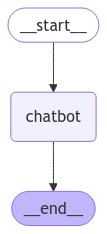

In [11]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

You can exit the chat loop at any time by typing "quit", "exit", or "q".

In [12]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break
    for event in graph.stream({"messages": ("user", user_input)}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

User: Hello
Assistant: Hello! How can I assist you today?
User: What's the wildfire in California?
Assistant: You're likely referring to the ongoing wildfires in California. Unfortunately, California has been experiencing a series of devastating wildfires in recent years, and it's difficult to pinpoint a single wildfire without more specific information. However, I can provide you with some general information about the current wildfire situation in California.

**Current Wildfires:**

As of my knowledge cutoff, there are several active wildfires burning across California. Some of the most notable ones include:

1. **The Dixie Fire:** This is one of the largest wildfires in California's history, burning over 963,000 acres in Plumas, Butte, Lassen, and Shasta counties.
2. **The Caldor Fire:** This fire has burned over 219,000 acres in El Dorado and Amador counties, forcing evacuations and closures in the Sierra Nevada foothills.
3. **The Monument Fire:** This fire has burned over 55,000

This bot can engage in basic conversation by taking user input and generating responses using an LLM. However, you may have noticed that the bot's knowledge is limited to what's in its training data.

### Add Web Search

To handle queries our chatbot can't answer "from memory", we'll integrate a web search tool. Our bot can use this tool to find relevant information and provide better responses.

https://python.langchain.com/v0.2/docs/integrations/tools/tavily_search/
Tavily's Search API is a search engine built specifically for AI agents (LLMs), delivering real-time, accurate, and factual results at speed.

https://tavily.com/, https://app.tavily.com/home (signin via google account)

In [13]:
%pip install -qU "langchain-community>=0.2.11" tavily-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.2 MB/s eta 0:00:00


In [14]:
import getpass
import os

if not os.environ.get("TAVILY_API_KEY"):
    os.environ["TAVILY_API_KEY"] = getpass.getpass("Tavily API key:\n")

Tavily API key:
··········


instantiate an instance of the Tavily search tools

In [15]:
from langchain_community.tools import TavilySearchResults

tool = TavilySearchResults(
    max_results=5,
    search_depth="advanced",
    include_answer=True,
    include_raw_content=True,
    include_images=True,
    # include_domains=[...],
    # exclude_domains=[...],
    # name="...",            # overwrite default tool name
    # description="...",     # overwrite default tool description
    # args_schema=...,       # overwrite default args_schema: BaseModel
)

The TavilySearchResults tool takes a single "query" argument, which should be a natural language query:

In [16]:
tool.invoke({"query": "What happened at San Jose"})

[{'url': 'https://www.cnn.com/us/live-news/san-jose-ca-shooting-05-27-21/index.html',
  'content': 'At least nine people were killed after a gunman opened fire Wednesday morning at a public transit yard in San Jose, California. Police officials say the gunman, who is believed to have taken his ...'},
 {'url': 'https://en.wikipedia.org/wiki/2021_San_Jose_shooting',
  'content': 'On May 26, 2021, a mass shooting occurred at a Santa Clara Valley Transportation Authority (VTA) rail yard in San Jose, California, United States.A 57-year-old VTA employee, Samuel James Cassidy, shot and killed nine VTA employees before committing suicide. [1] [4] It is the deadliest mass shooting in the history of the San Francisco Bay Area.[5]As a result of the shooting, service throughout ...'},
 {'url': 'https://www.cbsnews.com/live-updates/san-jose-shooting-9-dead/',
  'content': '9 people killed, suspect dead in San Jose shooting. Updated on: May 27, 2021 / 6:42 AM EDT / CBS News. An employee opened fire 

In [17]:
result = tool.invoke("What's a 'node' in LangGraph?")

In [18]:
result

[{'url': 'https://langchain-ai.github.io/langgraph/concepts/low_level/',
  'content': 'Nodes¶ In LangGraph, nodes are typically python functions (sync or async) where the first positional argument is the state, and (optionally), the second positional argument is a "config", containing optional configurable parameters (such as a thread_id). Similar to NetworkX, you add these nodes to a graph using the add_node method:'},
 {'url': 'https://medium.com/@kbdhunga/langgraph-multi-agent-collaboration-explained-c0500b0f2e61',
  'content': 'Nodes: Nodes in LangGraph represent individual units of computation or functionality within a graph. Nodes can be functions or runnables that perform specific tasks or operations.'},
 {'url': 'https://www.datacamp.com/tutorial/langgraph-tutorial',
  'content': "In LangGraph, each node represents an LLM agent, and the edges are the communication channels between these agents. This structure allows for clear and manageable workflows, where each agent performs 

In [19]:
len(result)

5

In [20]:
result[0]

{'url': 'https://langchain-ai.github.io/langgraph/concepts/low_level/',
 'content': 'Nodes¶ In LangGraph, nodes are typically python functions (sync or async) where the first positional argument is the state, and (optionally), the second positional argument is a "config", containing optional configurable parameters (such as a thread_id). Similar to NetworkX, you add these nodes to a graph using the add_node method:'}

We can use our tool in a chain by first binding it to a tool-calling model and then calling it:

In [21]:
import datetime

from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnableConfig, chain

today = datetime.datetime.today().strftime("%D")
prompt = ChatPromptTemplate(
    [
        ("system", f"You are a helpful assistant. The date today is {today}."),
        ("human", "{user_input}"),
        ("placeholder", "{messages}"),
    ]
)

# specifying tool_choice will force the model to call this tool.
llm_with_tools = llm.bind_tools([tool])

llm_chain = prompt | llm_with_tools


@chain
def tool_chain(user_input: str, config: RunnableConfig):
    input_ = {"user_input": user_input}
    ai_msg = llm_chain.invoke(input_, config=config)
    tool_msgs = tool.batch(ai_msg.tool_calls, config=config)
    return llm_chain.invoke({**input_, "messages": [ai_msg, *tool_msgs]}, config=config)


In [22]:
tool_chain.invoke("What happened at San Jose")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'chatcmpl-tool-0d2d02d89530451a99753b3a24dd6080', 'type': 'function', 'function': {'name': 'tavily_search_results_json', 'arguments': '{"query": "San Jose news"}'}}]}, response_metadata={'role': 'assistant', 'content': None, 'tool_calls': [{'id': 'chatcmpl-tool-0d2d02d89530451a99753b3a24dd6080', 'type': 'function', 'function': {'name': 'tavily_search_results_json', 'arguments': '{"query": "San Jose news"}'}}], 'token_usage': {'prompt_tokens': 375, 'total_tokens': 393, 'completion_tokens': 18}, 'finish_reason': 'tool_calls', 'model_name': 'meta/llama-3.1-8b-instruct'}, id='run-e853bd12-46e9-4a7d-81c8-ff503f21ba2a-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'San Jose news'}, 'id': 'chatcmpl-tool-0d2d02d89530451a99753b3a24dd6080', 'type': 'tool_call'}], role='assistant')

### Langgraph with Web Search

In [28]:
from langchain_nvidia_ai_endpoints import ChatNVIDIA

# Uncomment the below code to list the availabe models
# ChatNVIDIA.get_available_models()


llm = ChatNVIDIA(
  model="meta/llama-3.1-8b-instruct",
  api_key=os.environ["NVIDIA_API_KEY"],
  temperature=0.2,
  top_p=0.7,
  max_tokens=1024,
)

In [29]:
from langchain_community.tools import TavilySearchResults

tool = TavilySearchResults(
    max_results=5,
    search_depth="advanced",
    include_answer=True,
    include_raw_content=True,
    include_images=True,
    # include_domains=[...],
    # exclude_domains=[...],
    # name="...",            # overwrite default tool name
    # description="...",     # overwrite default tool description
    # args_schema=...,       # overwrite default args_schema: BaseModel
)

In [30]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START
from langgraph.graph.message import add_messages


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

tools = [tool]
# Modification: tell the LLM which tools it can call
llm_with_tools = llm.bind_tools(tools)


def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)

Next we need to create a function to actually run the tools if they are called. We'll do this by adding the tools to a new node.

Below, implement a BasicToolNode that checks the most recent message in the state and calls tools if the message contains tool_calls. It relies on the LLM's tool_calling support, which is available in Anthropic, OpenAI, Google Gemini, and a number of other LLM providers.

In [31]:
import json

from langchain_core.messages import ToolMessage


class BasicToolNode:
    """A node that runs the tools requested in the last AIMessage."""

    def __init__(self, tools: list) -> None:
        self.tools_by_name = {tool.name: tool for tool in tools}

    def __call__(self, inputs: dict):
        if messages := inputs.get("messages", []):
            message = messages[-1]
        else:
            raise ValueError("No message found in input")
        outputs = []
        for tool_call in message.tool_calls:
            tool_result = self.tools_by_name[tool_call["name"]].invoke(
                tool_call["args"]
            )
            outputs.append(
                ToolMessage(
                    content=json.dumps(tool_result),
                    name=tool_call["name"],
                    tool_call_id=tool_call["id"],
                )
            )
        return {"messages": outputs}


tool_node = BasicToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

call define a router function called route_tools, that checks for tool_calls in the chatbot's output. Provide this function to the graph by calling add_conditional_edges, which tells the graph that whenever the chatbot node completes to check this function to see where to go next.

The condition will route to tools if tool calls are present and "__end__" if not.

In [32]:
from typing import Literal


def route_tools(
    state: State,
) -> Literal["tools", "__end__"]:
    """
    Use in the conditional_edge to route to the ToolNode if the last message
    has tool calls. Otherwise, route to the end.
    """
    if isinstance(state, list):
        ai_message = state[-1]
    elif messages := state.get("messages", []):
        ai_message = messages[-1]
    else:
        raise ValueError(f"No messages found in input state to tool_edge: {state}")
    if hasattr(ai_message, "tool_calls") and len(ai_message.tool_calls) > 0:
        return "tools"
    return "__end__"


# The `tools_condition` function returns "tools" if the chatbot asks to use a tool, and "__end__" if
# it is fine directly responding. This conditional routing defines the main agent loop.
graph_builder.add_conditional_edges(
    "chatbot",
    route_tools,
    # The following dictionary lets you tell the graph to interpret the condition's outputs as a specific node
    # It defaults to the identity function, but if you
    # want to use a node named something else apart from "tools",
    # You can update the value of the dictionary to something else
    # e.g., "tools": "my_tools"
    {"tools": "tools", "__end__": "__end__"},
)
# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")
graph = graph_builder.compile()

conditional edges start from a single node. This tells the graph "any time the 'chatbot' node runs, either go to 'tools' if it calls a tool, or end the loop if it responds directly.

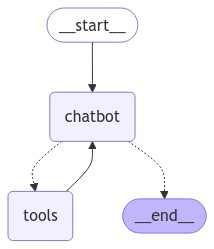

In [33]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

Now we can ask the bot questions outside its training data.

In [36]:
from langchain_core.messages import BaseMessage

while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break
    for event in graph.stream({"messages": [("user", user_input)]}):
        for value in event.values():
            if isinstance(value["messages"][-1], BaseMessage):
                print("Assistant:", value["messages"][-1].content)

User: Tell me more about langgraph
Assistant: 
Assistant: [{"url": "https://github.com/langchain-ai/langgraph", "content": "LangGraph is a framework for creating stateful, multi-actor applications with LLMs, using cycles, controllability, and persistence. It integrates with LangChain and LangSmith, and supports human-in-the-loop and streaming features."}, {"url": "https://www.langchain.com/langgraph", "content": "LangGraph is a framework for building stateful, multi-actor agents with LLMs that can handle complex scenarios and collaborate with humans. Learn how to use LangGraph with Python or JavaScript, and deploy your agents at scale with LangGraph Cloud."}, {"url": "https://www.datacamp.com/tutorial/langgraph-tutorial", "content": "LangGraph is a library within the LangChain ecosystem that simplifies the development of complex, multi-agent large language model (LLM) applications. Learn how to use LangGraph to create stateful, flexible, and scalable systems with nodes, edges, and stat

### Adding Memory to the Chatbot

LangGraph solves this problem through persistent checkpointing. If you provide a checkpointer when compiling the graph and a thread_id when calling your graph, LangGraph automatically saves the state after each step. When you invoke the graph again using the same thread_id, the graph loads its saved state, allowing the chatbot to pick up where it left off.

In [37]:
from langgraph.checkpoint.memory import MemorySaver

#create a MemorySaver checkpointer
memory = MemorySaver()

we're using an in-memory checkpointer. This is convenient for our tutorial (it saves it all in-memory). In a production application, you would likely change this to use SqliteSaver or PostgresSaver and connect to your own DB.

Next define the graph. Now that you've already built your own BasicToolNode, we'll replace it with LangGraph's prebuilt ToolNode and tools_condition, since these do some nice things like parallel API execution.

In [38]:
from langchain_nvidia_ai_endpoints import ChatNVIDIA

# Uncomment the below code to list the availabe models
# ChatNVIDIA.get_available_models()


llm = ChatNVIDIA(
  model="meta/llama-3.1-8b-instruct",
  api_key=os.environ["NVIDIA_API_KEY"],
  temperature=0.2,
  top_p=0.7,
  max_tokens=1024,
)

In [39]:
from typing import Annotated

from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.messages import BaseMessage
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)


tool = TavilySearchResults(max_results=2)
tools = [tool]
llm_with_tools = llm.bind_tools(tools)


def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)

tool_node = ToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")

Finally, compile the graph with the provided checkpointer.

In [40]:
graph = graph_builder.compile(checkpointer=memory)

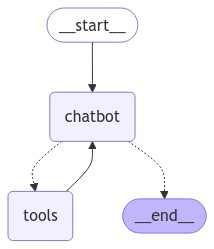

In [41]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

Now you can interact with your bot! First, pick a thread to use as the key for this conversation.

In [42]:
config = {"configurable": {"thread_id": "1"}}

In [49]:
user_input = "Hi there! My name is SJSU."

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Hi there! My name is SJSU.
================================== Ai Message ==================================

Nice to meet you, SJSU! It's a unique name, is it a nickname or a reference to San Jose State University?


In [50]:
len(event['messages'])

4

In [51]:
event['messages'][-2]

HumanMessage(content='Hi there! My name is SJSU.', id='c3ffa6ba-d523-46d3-b5db-932864965583')

In [52]:
event['messages'][-1]

AIMessage(content="Nice to meet you, SJSU! It's a unique name, is it a nickname or a reference to San Jose State University?", response_metadata={'role': 'assistant', 'content': "Nice to meet you, SJSU! It's a unique name, is it a nickname or a reference to San Jose State University?", 'token_usage': {'prompt_tokens': 354, 'total_tokens': 382, 'completion_tokens': 28}, 'finish_reason': 'stop', 'model_name': 'meta/llama-3.1-8b-instruct'}, id='run-11db8315-bf75-4ad9-b3ad-787de5da2a6a-0', role='assistant')

The config was provided as the second positional argument when calling our graph. It importantly is not nested within the graph inputs ({'messages': []}).

In [53]:
user_input = "Remember my name?"

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Remember my name?
================================== Ai Message ==================================

I'll remember your name as SJSU for our conversation.


In [54]:
# The only difference is we change the `thread_id` here to "2" instead of "1"
events = graph.stream(
    {"messages": [("user", user_input)]},
    {"configurable": {"thread_id": "2"}},
    stream_mode="values",
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Remember my name?
================================== Ai Message ==================================

I'm happy to chat with you, but I don't have any prior knowledge or memory of our previous conversations. Each time you interact with me, it's a new conversation and I don't retain any information from previous chats.


By now, we have made a few checkpoints across two different threads. But what goes into a checkpoint? To inspect a graph's state for a given config at any time, call get_state(config).

In [55]:
snapshot = graph.get_state(config)
snapshot

StateSnapshot(values={'messages': [HumanMessage(content='Hi there! Good Morning.', id='2c99bc70-434c-43e4-85a8-86bd9ec93f3b'), AIMessage(content="Good morning! It's nice to meet you. Is there anything I can help you with today?", response_metadata={'role': 'assistant', 'content': "Good morning! It's nice to meet you. Is there anything I can help you with today?", 'token_usage': {'prompt_tokens': 314, 'total_tokens': 334, 'completion_tokens': 20}, 'finish_reason': 'stop', 'model_name': 'meta/llama-3.1-8b-instruct'}, id='run-b70e9acf-419c-4348-80c9-b295e208871b-0'), HumanMessage(content='Hi there! My name is SJSU.', id='c3ffa6ba-d523-46d3-b5db-932864965583'), AIMessage(content="Nice to meet you, SJSU! It's a unique name, is it a nickname or a reference to San Jose State University?", response_metadata={'role': 'assistant', 'content': "Nice to meet you, SJSU! It's a unique name, is it a nickname or a reference to San Jose State University?", 'token_usage': {'prompt_tokens': 354, 'total_to

The snapshot above contains the current state values, corresponding config, and the next node to process. In our case, the graph has reached an __end__ state, so next is empty.

chatbot can now maintain conversation state across sessions thanks to LangGraph's checkpointing system. LangGraph's checkpointing even handles arbitrarily complex graph states, which is much more expressive and powerful than simple chat memory.

### Human-in-the-loop

Agents can be unreliable and may need human input to successfully accomplish tasks. Similarly, for some actions, you may want to require human approval before running to ensure that everything is running as intended. This can be in several ways, but the primary supported way is to add an "interrupt" before a node is executed. This interrupts execution at that node. You can then resume from that spot to continue.



we will use LangGraph's interrupt_before functionality to always break the tool node. You can accomplish similar functionality using either `interrupt_before` or `interrupt_after` in the create_react_agent(model, tools=tool, interrupt_before=["tools" | "agent"], interrupt_after=["tools" | "agent"]) constructor.

https://langchain-ai.github.io/langgraph/reference/prebuilt/#create_react_agent

In [56]:
from langchain_nvidia_ai_endpoints import ChatNVIDIA

# Uncomment the below code to list the availabe models
# ChatNVIDIA.get_available_models()


llm = ChatNVIDIA(
  model="meta/llama-3.1-8b-instruct",
  api_key=os.environ["NVIDIA_API_KEY"],
  temperature=0.2,
  top_p=0.7,
  max_tokens=1024,
)

https://langchain-ai.github.io/langgraph/reference/prebuilt/#toolnode

We can now wrap these tools in a simple ToolNode. This is a simple class that takes in a list of messages containing an AIMessages with tool_calls, runs the tools, and returns the output as ToolMessages.

In [57]:
from typing import Annotated

from langchain_community.tools.tavily_search import TavilySearchResults
from typing_extensions import TypedDict

from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph, START
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition

memory = MemorySaver()


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)


tool = TavilySearchResults(max_results=2)
tools = [tool]

#we should make sure the model knows that it has these tools available to call.
#We can do this by converting the LangChain tools into the format for LLM function calling, and then bind them to the model class.
llm_with_tools = llm.bind_tools(tools)


def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)

#We can now wrap these tools in a simple ToolNode. This is a simple class that takes in a list of messages containing an AIMessages with tool_calls,
#runs the tools, and returns the output as ToolMessages.
tool_node = ToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")

Now, compile the graph, specifying to interrupt_before the tools node. To always interrupt before a particular node, pass the name of the node to compile

In [58]:
graph = graph_builder.compile(
    checkpointer=memory,
    # This is new!
    interrupt_before=["tools"],
    # Note: can also interrupt __after__ tools, if desired.
    # interrupt_after=["tools"]
)

In [59]:
user_input = "I'm learning LangGraph. Could you do some research on it for me?"
config = {"configurable": {"thread_id": "1"}}
# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================ Human Message =================================

I'm learning LangGraph. Could you do some research on it for me?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (chatcmpl-tool-e27a0088aba041949bb217750735f223)
 Call ID: chatcmpl-tool-e27a0088aba041949bb217750735f223
  Args:
    query: LangGraph


Let's inspect the graph state to confirm it worked.

In [60]:
snapshot = graph.get_state(config)
snapshot.next

('tools',)

In [61]:
existing_message = snapshot.values["messages"][-1]
existing_message.tool_calls

[{'name': 'tavily_search_results_json',
  'args': {'query': 'LangGraph'},
  'id': 'chatcmpl-tool-e27a0088aba041949bb217750735f223',
  'type': 'tool_call'}]

In [62]:
# `None` will append nothing new to the current state, letting it resume as if it had never been interrupted
events = graph.stream(None, config, stream_mode="values")
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (chatcmpl-tool-e27a0088aba041949bb217750735f223)
 Call ID: chatcmpl-tool-e27a0088aba041949bb217750735f223
  Args:
    query: LangGraph
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://www.langchain.com/langgraph", "content": "LangGraph is a framework for building stateful, multi-actor agents with LLMs that can handle complex scenarios and collaborate with humans. Learn how to use LangGraph with Python or JavaScript, and deploy your agents at scale with LangGraph Cloud."}, {"url": "https://www.datacamp.com/tutorial/langgraph-tutorial", "content": "LangGraph is a library within the LangChain ecosystem that simplifies the development of complex, multi-agent large language model (LLM) applications. Learn how to use LangGraph to create stateful, flexible, and scalable systems with nodes, 

### Customize the bot's behavior using custom state updates.

we showed how to interrupt a graph so that a human could inspect its actions. This lets the human read the state, but if they want to change their agent's course, they'll need to have write access.

LangGraph lets you manually update state! Updating the state lets you control the agent's trajectory by modifying its actions (even modifying the past!). This capability is particularly useful when you want to correct the agent's mistakes, explore alternative paths, or guide the agent towards a specific goal.

In [63]:
from typing import Annotated

from langchain_community.tools.tavily_search import TavilySearchResults
from typing_extensions import TypedDict

from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph, START
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)


tool = TavilySearchResults(max_results=2)
tools = [tool]

llm_with_tools = llm.bind_tools(tools)


def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)

tool_node = ToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")
memory = MemorySaver()
graph = graph_builder.compile(
    checkpointer=memory,
    # This is new!
    interrupt_before=["tools"],
    # Note: can also interrupt **after** actions, if desired.
    # interrupt_after=["tools"]
)

user_input = "I'm learning LangGraph. Could you do some research on it for me?"
config = {"configurable": {"thread_id": "1"}}
# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream({"messages": [("user", user_input)]}, config)
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

In [64]:
snapshot = graph.get_state(config)
existing_message = snapshot.values["messages"][-1]
existing_message.pretty_print()

================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (chatcmpl-tool-7766e89b71d042eb880822c7542f8ad1)
 Call ID: chatcmpl-tool-7766e89b71d042eb880822c7542f8ad1
  Args:
    query: LangGraph


In [65]:
from langchain_core.messages import AIMessage, ToolMessage

answer = (
    "LangGraph is a library for building stateful, multi-actor applications with LLMs."
)
new_messages = [
    # The LLM API expects some ToolMessage to match its tool call. We'll satisfy that here.
    ToolMessage(content=answer, tool_call_id=existing_message.tool_calls[0]["id"]),
    # And then directly "put words in the LLM's mouth" by populating its response.
    AIMessage(content=answer),
]

new_messages[-1].pretty_print()
graph.update_state(
    # Which state to update
    config,
    # The updated values to provide. The messages in our `State` are "append-only", meaning this will be appended
    # to the existing state. We will review how to update existing messages in the next section!
    {"messages": new_messages},
)

print("\n\nLast 2 messages;")
print(graph.get_state(config).values["messages"][-2:])

================================== Ai Message ==================================

LangGraph is a library for building stateful, multi-actor applications with LLMs.


Last 2 messages;
[ToolMessage(content='LangGraph is a library for building stateful, multi-actor applications with LLMs.', id='7a6e8c97-dba3-428e-8347-6e57651a11dc', tool_call_id='chatcmpl-tool-7766e89b71d042eb880822c7542f8ad1'), AIMessage(content='LangGraph is a library for building stateful, multi-actor applications with LLMs.', id='29d7b79b-db9b-42c3-9d38-ab2147c171e3')]


In [66]:
graph.update_state(
    config,
    {"messages": [AIMessage(content="I'm an AI expert!")]},
    # Which node for this function to act as. It will automatically continue
    # processing as if this node just ran.
    as_node="chatbot",
)

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1ef705c5-c2de-6eee-8003-182508afa521'}}

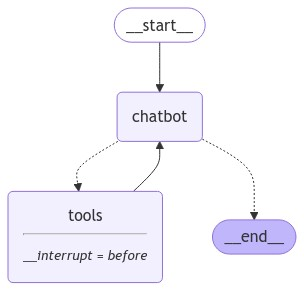

In [67]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

Inspect the current state as before to confirm the checkpoint reflects our manual updates.

In [68]:
snapshot = graph.get_state(config)
print(snapshot.values["messages"][-3:])
print(snapshot.next)

[ToolMessage(content='LangGraph is a library for building stateful, multi-actor applications with LLMs.', id='7a6e8c97-dba3-428e-8347-6e57651a11dc', tool_call_id='chatcmpl-tool-7766e89b71d042eb880822c7542f8ad1'), AIMessage(content='LangGraph is a library for building stateful, multi-actor applications with LLMs.', id='29d7b79b-db9b-42c3-9d38-ab2147c171e3'), AIMessage(content="I'm an AI expert!", id='b2021974-0331-4a90-8d41-b25227e3b00e')]
()


As an example, let's update the tool invocation to make sure we get good results from our search engine! First, start a new thread:

In [69]:
user_input = "I'm learning LangGraph. Could you do some research on it for me?"
config = {"configurable": {"thread_id": "2"}}  # we'll use thread_id = 2 here
events = graph.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================ Human Message =================================

I'm learning LangGraph. Could you do some research on it for me?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (chatcmpl-tool-0f91d6404e804ac6884bbadd93c5776d)
 Call ID: chatcmpl-tool-0f91d6404e804ac6884bbadd93c5776d
  Args:
    query: LangGraph


Next, let's update the tool invocation for our agent. Maybe we want to search for human-in-the-loop workflows in particular.

In [70]:
from langchain_core.messages import AIMessage

snapshot = graph.get_state(config)
existing_message = snapshot.values["messages"][-1]
print("Original")
print("Message ID", existing_message.id)
print(existing_message.tool_calls[0])
new_tool_call = existing_message.tool_calls[0].copy()
new_tool_call["args"]["query"] = "LangGraph human-in-the-loop workflow"
new_message = AIMessage(
    content=existing_message.content,
    tool_calls=[new_tool_call],
    # Important! The ID is how LangGraph knows to REPLACE the message in the state rather than APPEND this messages
    id=existing_message.id,
)

print("Updated")
print(new_message.tool_calls[0])
print("Message ID", new_message.id)
graph.update_state(config, {"messages": [new_message]})

print("\n\nTool calls")
graph.get_state(config).values["messages"][-1].tool_calls

Original
Message ID run-7cb1d704-1961-4b31-9f5b-196c40e333ef-0
{'name': 'tavily_search_results_json', 'args': {'query': 'LangGraph'}, 'id': 'chatcmpl-tool-0f91d6404e804ac6884bbadd93c5776d', 'type': 'tool_call'}
Updated
{'name': 'tavily_search_results_json', 'args': {'query': 'LangGraph human-in-the-loop workflow'}, 'id': 'chatcmpl-tool-0f91d6404e804ac6884bbadd93c5776d', 'type': 'tool_call'}
Message ID run-7cb1d704-1961-4b31-9f5b-196c40e333ef-0


Tool calls


[{'name': 'tavily_search_results_json',
  'args': {'query': 'LangGraph human-in-the-loop workflow'},
  'id': 'chatcmpl-tool-0f91d6404e804ac6884bbadd93c5776d',
  'type': 'tool_call'}]

Notice that we've modified the AI's tool invocation to search for "LangGraph human-in-the-loop workflow" instead of the simple "LangGraph".

Resume the graph by streaming with an input of None and the existing config.

In [71]:
events = graph.stream(None, config, stream_mode="values")
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (chatcmpl-tool-0f91d6404e804ac6884bbadd93c5776d)
 Call ID: chatcmpl-tool-0f91d6404e804ac6884bbadd93c5776d
  Args:
    query: LangGraph human-in-the-loop workflow
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://www.geeky-gadgets.com/human-in-the-loop-ai/", "content": "Human in the Loop AI systems with LangChain and LangGraph.js By integrating human intervention at key decision points, such as processing refunds, LangGraph.js addresses the problem of potential AI errors or misuse. HITL involves strategically integrating human intervention and decision-making into AI workflows, allowing for a seamless collaboration between human expertise and machine intelligence. This guide by the team at LangChain explores the significance of HITL and how LangGraph.js, a powerful tool for AI workflow

In [72]:
events = graph.stream(
    {
        "messages": (
            "user",
            "Remember what I'm learning about?",
        )
    },
    config,
    stream_mode="values",
)
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================ Human Message =================================

Remember what I'm learning about?
================================== Ai Message ==================================

You're learning about LangGraph. I did some research on it for you earlier.
